# Kaggle Dataset Competition
## House Prices - Advanced Regression Techniques (Top 8%)

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
train_df = pd.read_csv('train.csv' ,index_col='Id')
test_df = pd.read_csv('test.csv' , index_col = 'Id')
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [4]:
print("Training data: {}".format(train_df.shape))
print("Testing  data: {}".format(test_df.shape))

Training data: (1460, 80)
Testing  data: (1459, 79)


In [5]:
train_df.isna().mean()

MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 80, dtype: float64

In [6]:
test_df.isna().mean()

MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
Street           0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000685
SaleCondition    0.000000
Length: 79, dtype: float64

In [7]:
#Since the test data also has null values, both the sets of data is concatenated

final_df = pd.concat([train_df , test_df] , axis =0 , sort = False)
final_df.drop('SalePrice' , axis = 1 ,inplace = True)
final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [8]:
final_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Feature Engineering

In [9]:
#Analysing the columns with null values

null_df = pd.DataFrame(final_df.isna().mean() , columns =['%count']).sort_values(by = '%count' , ascending = False)
null_df = null_df[null_df['%count']!=0]
null_df

,%count
PoolQC,0.996574
MiscFeature,0.964029
Alley,0.932169
Fence,0.804385
FireplaceQu,0.486468
LotFrontage,0.166495
GarageYrBlt,0.054471
GarageFinish,0.054471
GarageQual,0.054471
GarageCond,0.054471


<AxesSubplot:xlabel='%count'>

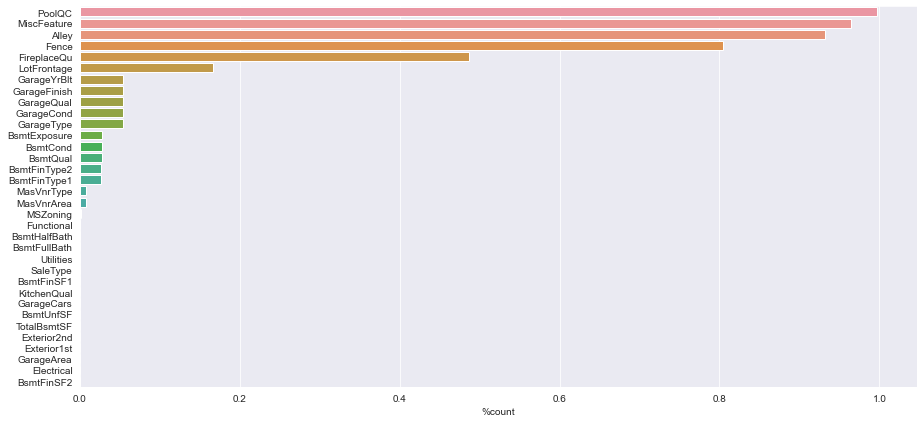

In [10]:
### Bar graph of null values in the features 

sns.set_style('darkgrid')

plt.figure(figsize = (15, 7))
sns.barplot(x = null_df['%count'] , y = null_df.index)

<AxesSubplot:ylabel='Id'>

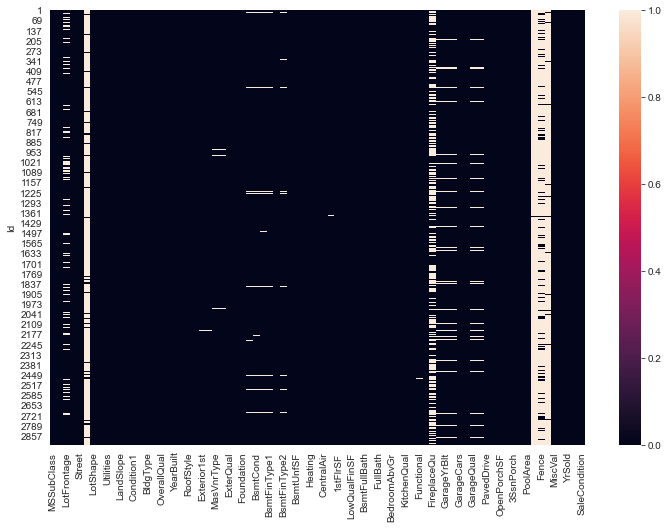

In [11]:
### Heatmap of null values

plt.figure(figsize= (12,8))
sns.heatmap(final_df.isna())

In [12]:
null_df.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'Functional', 'BsmtHalfBath',
       'BsmtFullBath', 'Utilities', 'SaleType', 'BsmtFinSF1', 'KitchenQual',
       'GarageCars', 'BsmtUnfSF', 'TotalBsmtSF', 'Exterior2nd', 'Exterior1st',
       'GarageArea', 'Electrical', 'BsmtFinSF2'],
      dtype='object')

In [13]:
# dropping 'PoolQC', 'MiscFeature', 'Alley', 'Fence' since they have more than 80% null values

final_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'] ,axis =1 , inplace = True)
train_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'] ,axis =1 , inplace = True)

In [14]:
final_df.shape

(2919, 75)

In [15]:
final_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [16]:
#Analysing the columns with null values

null_df = pd.DataFrame(final_df.isna().sum()/final_df.shape[0] , columns =['%count']).sort_values(by = '%count' , ascending = False)
null_df = null_df[null_df['%count']!=0]
null_df

,%count
FireplaceQu,0.486468
LotFrontage,0.166495
GarageQual,0.054471
GarageFinish,0.054471
GarageCond,0.054471
GarageYrBlt,0.054471
GarageType,0.053786
BsmtCond,0.028092
BsmtExposure,0.028092
BsmtQual,0.027749


In [17]:
corr_matrix = train_df.corr()

In [18]:
### Fetching the categorical and numeric columns

numeric_cols = [i for i in corr_matrix.columns if i!= "SalePrice"]
categorical_cols = [i for i in final_df.columns if i not in numeric_cols and i!="SalePrice"]

print("Categorical Columns: {} ".format(len(categorical_cols)))
print("Numeric Columns: {} ".format(len(numeric_cols)))

Categorical Columns: 39 
Numeric Columns: 36 


### 1.Missing values in Categorical Columns

In [19]:
### Categorical features that have null values

category_null_df = pd.DataFrame(final_df[categorical_cols].isna().mean(), columns =['%count']).sort_values(by = '%count' , ascending = False)
category_null_df = category_null_df[category_null_df['%count']!=0]
category_null_df

,%count
FireplaceQu,0.486468
GarageCond,0.054471
GarageQual,0.054471
GarageFinish,0.054471
GarageType,0.053786
BsmtExposure,0.028092
BsmtCond,0.028092
BsmtQual,0.027749
BsmtFinType2,0.027407
BsmtFinType1,0.027064


In [20]:
### count of features for every categorical column

for i in categorical_cols:
    print("{} : {}".format(i , final_df[i].value_counts().shape[0]))

MSZoning : 5
Street : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinType2 : 6
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
KitchenQual : 4
Functional : 7
FireplaceQu : 5
GarageType : 6
GarageFinish : 3
GarageQual : 5
GarageCond : 5
PavedDrive : 3
SaleType : 9
SaleCondition : 6


In [21]:
# some places might not have fireplaces
final_df['FireplaceQu'].fillna('NA' , inplace = True)

# Fill NA hor houses that dont have garage
for column in ['GarageCond' , 'GarageType' , 'GarageQual'  , 'GarageFinish']:
    final_df[column].fillna('NA' , inplace = True)
    
for column in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    final_df[column].fillna(0 , inplace = True)
    
# For houses that have a basement fill NA based on the description
for column in ['BsmtExposure','BsmtFinType1' ,'BsmtFinType2' , 'BsmtQual' , 'BsmtCond']:
    final_df[column].fillna('NA' , inplace = True)
    
# Masonry veneer type as None
final_df['MasVnrType'].fillna('None' , inplace =True)
final_df['MasVnrArea'].fillna(0, inplace = True)

# fill MsZoning with the most frequent category
final_df['MSZoning'].fillna(final_df['MSZoning'].mode()[0] , inplace =True)

# fill Functional with the most frequent category
final_df['Functional'].fillna(final_df['Functional'].mode()[0] , inplace =True)

#Utilities has imbalanced categories, won't help in predictive modelling
final_df.drop('Utilities' , axis =1 , inplace =True)

# fill with the most frequent category since the have only one missing value
final_df['Electrical'].fillna(final_df['Electrical'].mode()[0] , inplace =True)
final_df['Exterior1st'].fillna(final_df['Exterior1st'].mode()[0] , inplace =True)
final_df['Exterior2nd'].fillna(final_df['Exterior2nd'].mode()[0] , inplace =True)
final_df['SaleType'].fillna(final_df['SaleType'].mode()[0] , inplace =True)
final_df['KitchenQual'].fillna(final_df['KitchenQual'].mode()[0] , inplace =True)

In [22]:

### Categorical features that have null values
categorical_cols.remove('Utilities')
category_null_df = pd.DataFrame(final_df[categorical_cols].isna().mean(), columns =['%count']).sort_values(by = '%count' , ascending = False)
category_null_df = category_null_df[category_null_df['%count']!=0]
category_null_df

,%count


### 2. Missing values in numeric columns

In [23]:
### Numeric features that have null values

numeric_null_df = pd.DataFrame(final_df[numeric_cols].isna().mean(), columns =['%count']).sort_values(by = '%count' , ascending = False)
numeric_null_df = numeric_null_df[numeric_null_df['%count']!=0]
numeric_null_df['%count']*100

LotFrontage     16.649538
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
BsmtUnfSF        0.034258
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
TotalBsmtSF      0.034258
Name: %count, dtype: float64

<AxesSubplot:>

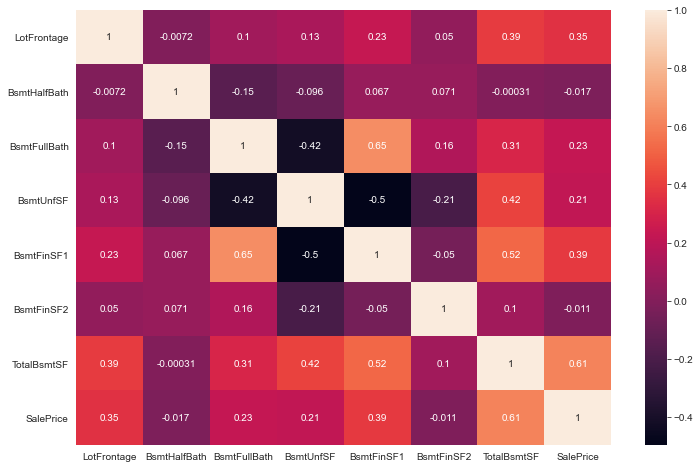

In [24]:
all_nums = numeric_null_df.index.to_list()
all_nums.append('SalePrice')

plt.figure(figsize = (12,8))
sns.heatmap(train_df[all_nums].corr() , annot = True)

In [25]:
train_df[all_nums].corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
TotalBsmtSF     0.613581
BsmtFinSF1      0.386420
LotFrontage     0.351799
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
BsmtFinSF2     -0.011378
BsmtHalfBath   -0.016844
Name: SalePrice, dtype: float64

C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

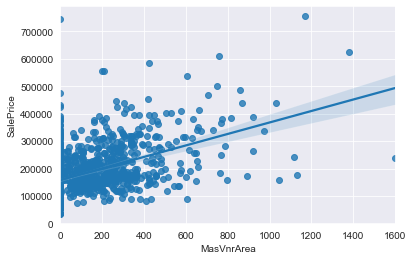

In [26]:
sns.regplot(train_df['MasVnrArea'] , train_df['SalePrice'])

In [27]:
final_df.shape

(2919, 74)

In [28]:
### Numeric features that have null values

numeric_null_df = pd.DataFrame(final_df[numeric_cols].isna().mean(), columns =['%count']).sort_values(by = '%count' , ascending = False)
numeric_null_df = numeric_null_df[numeric_null_df['%count']!=0]
numeric_null_df['%count']*100

LotFrontage     16.649538
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
BsmtUnfSF        0.034258
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
TotalBsmtSF      0.034258
Name: %count, dtype: float64

In [29]:
final_df['LotFrontage'].groupby(final_df['Neighborhood']).median()

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    51.0
ClearCr    80.5
CollgCr    70.0
Crawfor    70.0
Edwards    65.0
Gilbert    64.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    74.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.0
NridgHt    92.0
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    72.5
StoneBr    60.0
Timber     82.0
Veenker    80.0
Name: LotFrontage, dtype: float64

In [30]:
## Since no basement is present fill 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    final_df[col].fillna(0 , inplace = True)

In [31]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
final_df["LotFrontage"] = final_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [32]:
numeric_null_df = pd.DataFrame(final_df[numeric_cols].isna().sum(), columns =['%count']).sort_values(by = '%count' , ascending = False)
numeric_null_df = numeric_null_df[numeric_null_df['%count']!=0]
numeric_null_df

,%count


In [33]:
final_df.isna().sum().sum()

0

## Feature Selection

In [34]:
main_df = final_df.copy()

In [35]:
# final = pd.concat([final_df , train_df['SalePrice']] , axis = 1 )
# final.to_csv('final' , index = False)

In [36]:
### Using EDA generated data
final_df= pd.read_csv('eda_final',index_col = 'Unnamed: 0')
target = final_df['SalePrice']
final_df.drop('SalePrice' , axis = 1 , inplace = True)
final_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


### Correlation

In [37]:
### List of numeric and categorical features
#GrLivArea FullBath HalfBath BedroomAbvGr KitchenAbvGr TotRmsAbvGrd MoSold

numeric_features = final_df.corr().index.to_list()
numeric_features.remove('BsmtFullBath')
numeric_features.remove('BsmtHalfBath')
numeric_features.remove('GarageCars')


categorical_features = [i for i in final_df.columns if i not in numeric_features]

print("Categorical: {}".format(len(categorical_features)))
print("Numeric: {}".format(len(numeric_features)))

Categorical: 41
Numeric: 33


In [38]:
###Numeric categorical features

for i in ['FullBath' , 'HalfBath' , 'BedroomAbvGr' , 'KitchenAbvGr' ,'TotRmsAbvGrd', 'MoSold']:
    if i in numeric_features:
        numeric_features.remove(i)
        categorical_features.append(i)
        
print("Categorical: {}".format(len(categorical_features)))
print("Numeric: {}".format(len(numeric_features)))

Categorical: 47
Numeric: 27


In [39]:
### Creating a new feature

final_df['TotalSF'] = final_df['TotalBsmtSF'] + final_df['1stFlrSF'] + final_df['2ndFlrSF']

In [40]:
#Checking the correlation with SalePrice

temp_df = pd.concat([final_df , train_df['SalePrice']] , axis = 1  ,sort=False)

numeric_features.append('SalePrice')
corr_df = temp_df[numeric_features].corr()

In [41]:
corr_df['SalePrice'].sort_values(ascending = False).to_frame()

,SalePrice
SalePrice,1.000000
PoolArea,0.074525
2ndFlrSF,0.041319
EnclosedPorch,0.026044
GarageArea,0.022573
Fireplaces,0.020125
GrLivArea,0.019632
BsmtFinSF2,0.013903
MSSubClass,0.008498
MasVnrArea,0.006425


In [42]:
numeric_features.remove('SalePrice')
temp_df[numeric_features].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
MSSubClass,1.000000,-0.412025,-0.320735,0.035086,-0.065693,0.034419,0.044724,0.007146,-0.067151,-0.072554,-0.125319,-0.226478,-0.254998,0.309999,0.026583,0.072011,-0.057055,-0.105378,-0.104639,-0.022676,-0.015813,-0.021375,-0.037567,-0.049172,-0.003481,-0.031531,-0.015187
LotFrontage,-0.412025,1.000000,0.492160,0.201850,-0.057935,0.121612,0.084892,0.208059,0.174053,0.053195,0.104778,0.308384,0.414601,0.020500,0.003663,0.339417,0.235085,0.105642,0.344283,0.118691,0.144740,0.009339,0.030496,0.077610,0.110740,0.045197,-0.010048
LotArea,-0.320735,0.492160,1.000000,0.133698,-0.057868,0.039392,0.032480,0.153340,0.192661,0.066575,0.055607,0.282481,0.410614,0.048079,0.005595,0.360278,0.296304,0.101948,0.296084,0.191146,0.146726,0.047504,0.029194,0.096185,0.100691,0.090388,-0.039727
OverallQual,0.035086,0.201850,0.133698,1.000000,-0.093018,0.597433,0.571446,0.422763,0.275505,-0.042895,0.276235,0.551324,0.476406,0.243832,-0.048358,0.574961,0.389886,0.278445,0.563236,0.256578,0.292526,-0.138543,0.018955,0.043553,0.018689,0.012846,-0.019470
OverallCond,-0.065693,-0.057935,-0.057868,-0.093018,1.000000,-0.368272,0.047264,-0.133180,-0.049512,0.042657,-0.138948,-0.176896,-0.157700,0.006625,0.009107,-0.115688,-0.030159,0.015392,-0.153015,0.021201,-0.067917,0.071753,0.043846,0.043908,-0.014999,0.018920,0.030728
YearBuilt,0.034419,0.121612,0.039392,0.597433,-0.368272,1.000000,0.612483,0.306700,0.281557,-0.027165,0.130598,0.414454,0.311780,0.015719,-0.144229,0.241750,0.170473,0.259847,0.480965,0.230004,0.196431,-0.374555,0.016014,-0.040942,-0.003362,-0.009853,-0.012233
YearRemodAdd,0.044724,0.084892,0.032480,0.571446,0.047264,0.612483,1.000000,0.188663,0.151236,-0.060041,0.165193,0.302190,0.242449,0.157969,-0.060349,0.318464,0.133652,0.146581,0.375691,0.220189,0.240175,-0.220284,0.037569,-0.046679,-0.017148,-0.009024,0.034226
MasVnrArea,0.007146,0.208059,0.153340,0.422763,-0.133180,0.306700,0.188663,1.000000,0.290409,-0.012478,0.087570,0.385272,0.383418,0.114779,-0.057434,0.390790,0.268835,0.128619,0.366431,0.166197,0.130107,-0.109867,0.014461,0.067685,-0.013447,0.065172,-0.016517
BsmtFinSF1,-0.067151,0.174053,0.192661,0.275505,-0.049512,0.281557,0.151236,0.290409,1.000000,-0.058066,-0.489035,0.510174,0.433107,-0.175764,-0.067055,0.177978,0.282862,0.126769,0.298894,0.222330,0.107361,-0.099805,0.053136,0.101776,0.034197,0.114236,0.023227
BsmtFinSF2,-0.072554,0.053195,0.066575,-0.042895,0.042657,-0.027165,-0.060041,-0.012478,-0.058066,1.000000,-0.237203,0.090018,0.084114,-0.097366,-0.004771,-0.019164,0.063073,0.048655,0.003572,0.099708,-0.003599,0.032757,-0.023194,0.064037,0.047641,-0.008822,0.007407


In [43]:
### returns those features that that highly correlated among each other based on the theshold

def correlation(dataset , threshold):
    corr_matrix = dataset.corr()
    cols= set()
    
    for i in range(len(corr_matrix)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                cols.add(colname)
    
    return cols

In [44]:
### have to get rid of those features

corr_features = correlation(final_df[numeric_features] , 0.7)

final_df.drop(corr_features , axis = 1 , inplace = True)
final_df.shape

(2911, 74)

In [45]:
corr_features

{'1stFlrSF'}

In [46]:
final_df.drop(['Street' , 'Condition2'] , axis = 1 , inplace = True)

### Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

ordered_cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in ordered_cols:
    lbl = LabelEncoder() 
    lbl.fit(list(final_df[c].values)) 
    final_df[c] = lbl.transform(list(final_df[c].values))

# shape        
print('Shape all_data: {}'.format(final_df.shape))

Shape all_data: (2911, 72)


In [48]:
numeric_feats = final_df.dtypes[final_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = final_df[numeric_feats].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,25.366150
PoolArea,17.679401
LowQualFinSF,12.078088
3SsnPorch,11.365975
LandSlope,4.955199
KitchenAbvGr,4.316014
BsmtFinSF2,4.162525
EnclosedPorch,4.006874
ScreenPorch,3.942352
BsmtHalfBath,3.941716


In [49]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    
    final_df[feat] = boxcox1p(final_df[feat], lam)

There are 54 skewed numerical features to Box Cox transform


In [50]:
final_df = pd.get_dummies(final_df , drop_first=True)
final_df.shape

(2911, 175)

In [51]:
### Split the data 

from sklearn.model_selection import train_test_split

X_train , y_train =  final_df.loc[:1459 , :] , target.loc[:1459]
X_test =  final_df.loc[1460: , :]

X_train.shape , X_test.shape

((1452, 175), (1459, 175))

## Skewness of target feature

C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.8950295071795134


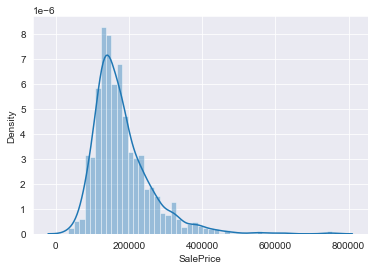

In [52]:
sns.distplot(y_train)
print("Skewness: {}".format(y_train.skew()))

In [53]:
y_train_transform = np.log(y_train)
y_train_transform

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1452, dtype: float64

## Xgboost Regressor

In [54]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
xgb = xgboost.XGBRegressor()

In [55]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01 , 0.05 , 0.1 , 0.15 , 0.2],
        'max_depth': [2, 5, 7, 10 , 15 , 20],
        'min_child_weight': [1, 2, 3,4 , 5 , 6],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'booster': ['gbtree', 'gblinear'],
        'n_estimators' : [ 500 , 900 , 1100 , 1500 , 2000 , 2500 , 3000],
        'objective': ['reg:squarederror']
    }

    xgb_model = xgboost.XGBRegressor()

    rsearch = RandomizedSearchCV(estimator = xgb_model,
                           param_distributions = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_root_mean_squared_error',  #RMSE
                           cv = 5,
                           n_iter = 100,
                           n_jobs = -1,
                           verbose = 3,
                           return_train_score = True,
                           random_state = 42)

    rsearch.fit(X_train,y_train)

    return rsearch.best_params_

In [87]:
hyperParameterTuning(X_train , y_train_transform)

In [56]:
xgb = xgboost.XGBRegressor(subsample= 0.5,
 objective= 'reg:squarederror',
 n_estimators=2000,
 min_child_weight=1,
 max_depth= 5,
 learning_rate= 0.01,
 colsample_bytree= 0.7,
 booster = 'gbtree')

In [57]:
#xgb.fit(X_train_new , y_train_new , early_stopping_rounds=5, eval_set=[(X_test_new, y_test_new)])
xgb.fit(X_train , y_train_transform)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
predictions = xgb.predict(X_test[cor_feature])
predictions = np.exp(predictions)

sub = pd.DataFrame(data =range(1461 , 2920) , columns = ['Id'])
sub['SalePrice'] = predictions

sub.to_csv('sub41' ,index = False)
sub.head()

In [ ]:
sns.distplot(np.exp(xgb.predict(X_train[cor_feature])) - y_train)

## Saving the model

In [ ]:
##saving the model
import pickle

file = open('xgboost_regression_model.pkl','wb')
pickle.dump(xgb , file)

In [58]:
#Validation function
from sklearn.model_selection import KFold , cross_val_score

n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train_transform, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [ ]:
rmsle_cv(xgb).mean()

### Hyperparameter Tuning with Random Forest

In [157]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [158]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [159]:
#model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid,
                               scoring='neg_root_mean_squared_error', 
                               n_iter = 50, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs =-1)


In [160]:
rf_random.fit(X_train , y_train_transform)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [161]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=5,
                      n_estimators=1000)

## ElasticNet
Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.
Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training.

## L2 Penalty
One popular penalty is to penalize a model based on the sum of the squared coefficient values. This is called an L2 penalty. An L2 penalty minimizes the size of all coefficients, although it prevents any coefficients from being removed from the model.

l2_penalty = sum j=0 to p beta_j^2

## L1 Penalty
Another popular penalty is to penalize a model based on the sum of the absolute coefficient values. This is called the L1 penalty. An L1 penalty minimizes the size of all coefficients and allows some coefficients to be minimized to the value zero, which removes the predictor from the model.

l1_penalty = sum j=0 to p abs(beta_j)


## Note:
Confusingly, the alpha hyperparameter can be set via the “l1_ratio” argument that controls the contribution of the L1 and L2 penalties and the lambda hyperparameter can be set via the “alpha” argument that controls the contribution of the sum of both penalties to the loss function.

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV

def hyperParameterTuningElasticNet(X_train, y_train):
    param_tuning = {
        'alpha' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
        'l1_ratio' : np.arange(0, 1, 0.01)
    }

    en_model = ElasticNet()

    rsearch = RandomizedSearchCV(estimator = en_model,
                           param_distributions = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_root_mean_squared_error',  #RMSE
                           cv = 5,
                           n_iter = 50,
                           n_jobs = -1,
                           verbose = 3,
                           return_train_score = True,
                           random_state = 42)

    rsearch.fit(X_train,y_train)

    return rsearch.best_params_

In [ ]:
hyperParameterTuningElasticNet(X_train , y_train_transform)

In [59]:
from sklearn.linear_model import ElasticNet

en_model = ElasticNet(l1_ratio=0.15 , alpha = 0.001)

en_model.fit(X_train , y_train_transform)

ElasticNet(alpha=0.001, l1_ratio=0.15)

In [ ]:
pred_en = en_model.predict(X_test)
pred_en = np.exp(pred_en)

sub = pd.DataFrame(data =range(1461 , 2920) , columns = ['Id'])
sub['SalePrice'] = pred_en

sub.to_csv('sub50' ,index = False)
sub.head()

In [ ]:
sns.distplot(np.exp(en_model.predict(X_train)) - y_train)

### Pipeline

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

enet = make_pipeline(RobustScaler() , en_model)
enet.fit(X_train , y_train_transform)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet', ElasticNet(alpha=0.001, l1_ratio=0.15))])

## Light GBM

LightGBM was described by Guolin Ke, et al. in the 2017 paper titled “LightGBM: A Highly Efficient Gradient Boosting Decision Tree.” The implementation introduces two key ideas: GOSS and EFB.

Gradient-based One-Side Sampling, or GOSS for short, is a modification to the gradient boosting method that focuses attention on those training examples that result in a larger gradient, in turn speeding up learning and reducing the computational complexity of the method.

Exclusive Feature Bundling, or EFB for short, is an approach for bundling sparse (mostly zero) mutually exclusive features, such as categorical variable inputs that have been one-hot encoded. As such, it is a type of automatic feature selection.

In [61]:
# check lightgbm version
import lightgbm
print(lightgbm.__version__)

3.2.1


In [62]:
lgbm = lightgbm.LGBMRegressor()

In [63]:
lgbm.fit(X_train , y_train_transform)

LGBMRegressor()

In [156]:
pred_lg = lgbm.predict(X_test)
pred_lg = np.exp(pred_lg)

sub = pd.DataFrame(data =range(1461 , 2920) , columns = ['Id'])
sub['SalePrice'] = pred_lg

sub.to_csv('sub52' ,index = False)
sub.head()

,Id,SalePrice
0,1461,120608.231578
1,1462,170050.934893
2,1463,181826.102528
3,1464,191422.632554
4,1465,190972.535424


## Lasso


In [64]:
from  sklearn.linear_model import Lasso

for i in [0.001 , 0.005 , 0.01 , 0.1 ,0.5]:
    lasso = Lasso(alpha=i)
    val = rmsle_cv(lasso)
    print("alpha = {} ==> RMSE = {}".format(i , val.mean()))

alpha = 0.001 ==> RMSE = 0.11738352511555819
alpha = 0.005 ==> RMSE = 0.1334026235175493
alpha = 0.01 ==> RMSE = 0.14948769825389757
alpha = 0.1 ==> RMSE = 0.2228275009879445
alpha = 0.5 ==> RMSE = 0.37544816207651666


In [65]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train_transform)

Lasso(alpha=0.001)

### Pipeline

In [66]:
lasso_pipe = make_pipeline(RobustScaler() ,  lasso)
lasso_pipe.fit(X_train , y_train_transform)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('lasso', Lasso(alpha=0.001))])

## Gradient Boosting 

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

def hyperParameterTuningGradientBoosting(X_train, y_train):
    param_tuning = {
        'n_estimators' : [ 32, 64, 100, 200 , 500 , 1000 , 1500 , 2000],
        'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
        'max_depth' : np.linspace(1, 32, 32, endpoint=True),
        'min_samples_split' : np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf' : np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features' : list(range(1,X_train.shape[1]))
    }

    gbr = GradientBoostingRegressor()

    rsearch = RandomizedSearchCV(estimator = gbr,
                           param_distributions = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_root_mean_squared_error',  #RMSE
                           cv = 5,
                           n_iter = 50,
                           n_jobs = -1,
                           verbose = 3,
                           return_train_score = True,
                           random_state = 42)

    rsearch.fit(X_train,y_train)

    return rsearch.best_params_

In [102]:
hyperParameterTuningGradientBoosting(X_train , y_train_transform)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


{'n_estimators': 500,
 'min_samples_split': 0.7000000000000001,
 'min_samples_leaf': 0.1,
 'max_features': 69,
 'max_depth': 11.0,
 'learning_rate': 0.1}

In [68]:
gbr = GradientBoostingRegressor(
 n_estimators= 500,
 min_samples_split= 0.7,
 min_samples_leaf= 0.1,
 max_features=69,
 max_depth = 11.0,
 learning_rate= 0.1)

gbr.fit(X_train , y_train_transform)

GradientBoostingRegressor(max_depth=11.0, max_features=69, min_samples_leaf=0.1,
                          min_samples_split=0.7, n_estimators=500)

In [104]:
rmsle_cv(gbr).mean()

0.13792296530920264

## Catboost

In [69]:
import catboost as cb

In [70]:
train_dataset = cb.Pool(X_train, y_train_transform) 
test_dataset = cb.Pool(X_test)

In [71]:
import catboost as cb
from sklearn.model_selection import RandomizedSearchCV

def hyperParameterTuningCatboost(X_train, y_train):
    param_tuning = {
        'iterations': [100, 150, 200],
        'learning_rate': [ 0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]
    }

    cboost = cb.CatBoostRegressor(loss_function='RMSE')

    rsearch = RandomizedSearchCV(estimator = cboost,
                           param_distributions = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_root_mean_squared_error',  #RMSE
                           cv = 5,
                           n_iter = 50,
                           n_jobs = -1,
                           verbose = 2,
                           return_train_score = True,
                           random_state = 42)

    rsearch.fit(X_train,y_train)

    return rsearch.best_params_

In [72]:
hyperParameterTuningCatboost(X_train , y_train_transform)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0:	learn: 0.3753228	total: 115ms	remaining: 22.9s
1:	learn: 0.3507251	total: 121ms	remaining: 12s
2:	learn: 0.3292263	total: 127ms	remaining: 8.32s
3:	learn: 0.3106395	total: 132ms	remaining: 6.49s
4:	learn: 0.2936395	total: 139ms	remaining: 5.43s
5:	learn: 0.2775999	total: 145ms	remaining: 4.68s
6:	learn: 0.2638701	total: 150ms	remaining: 4.15s
7:	learn: 0.2502500	total: 157ms	remaining: 3.78s
8:	learn: 0.2392871	total: 164ms	remaining: 3.48s
9:	learn: 0.2285656	total: 171ms	remaining: 3.25s
10:	learn: 0.2198478	total: 178ms	remaining: 3.06s
11:	learn: 0.2121562	total: 185ms	remaining: 2.9s
12:	learn: 0.2043168	total: 192ms	remaining: 2.77s
13:	learn: 0.1984587	total: 200ms	remaining: 2.65s
14:	learn: 0.1917180	total: 207ms	remaining: 2.55s
15:	learn: 0.1863587	total: 250ms	remaining: 2.87s
16:	learn: 0.1813330	total: 270ms	remaining: 2.9s
17:	learn: 0.1764114	total: 284ms	remaining: 2.87s
18:	learn: 0.1718110	total: 294ms	

166:	learn: 0.0895214	total: 1.5s	remaining: 295ms
167:	learn: 0.0893030	total: 1.5s	remaining: 286ms
168:	learn: 0.0892272	total: 1.51s	remaining: 277ms
169:	learn: 0.0890708	total: 1.51s	remaining: 267ms
170:	learn: 0.0890102	total: 1.52s	remaining: 258ms
171:	learn: 0.0888533	total: 1.53s	remaining: 248ms
172:	learn: 0.0886421	total: 1.53s	remaining: 239ms
173:	learn: 0.0884600	total: 1.54s	remaining: 230ms
174:	learn: 0.0882393	total: 1.54s	remaining: 221ms
175:	learn: 0.0881685	total: 1.55s	remaining: 211ms
176:	learn: 0.0880598	total: 1.56s	remaining: 202ms
177:	learn: 0.0878331	total: 1.56s	remaining: 193ms
178:	learn: 0.0876284	total: 1.57s	remaining: 184ms
179:	learn: 0.0874049	total: 1.57s	remaining: 175ms
180:	learn: 0.0873125	total: 1.58s	remaining: 166ms
181:	learn: 0.0872811	total: 1.58s	remaining: 157ms
182:	learn: 0.0872158	total: 1.59s	remaining: 148ms
183:	learn: 0.0871279	total: 1.6s	remaining: 139ms
184:	learn: 0.0870409	total: 1.6s	remaining: 130ms
185:	learn: 0.08

{'learning_rate': 0.1, 'l2_leaf_reg': 3, 'iterations': 200, 'depth': 4}

In [73]:
cboost = cb.CatBoostRegressor(learning_rate= 0.1 , 
                             l2_leaf_reg=3 , 
                             iterations = 200 , 
                             depth = 4)

cboost.fit(X_train , y_train_transform)

0:	learn: 0.3753228	total: 4.19ms	remaining: 834ms
1:	learn: 0.3507251	total: 8.13ms	remaining: 805ms
2:	learn: 0.3292263	total: 11.9ms	remaining: 784ms
3:	learn: 0.3106395	total: 17.4ms	remaining: 854ms
4:	learn: 0.2936395	total: 21.2ms	remaining: 826ms
5:	learn: 0.2775999	total: 24.9ms	remaining: 805ms
6:	learn: 0.2638701	total: 28.6ms	remaining: 788ms
7:	learn: 0.2502500	total: 32.4ms	remaining: 778ms
8:	learn: 0.2392871	total: 36.3ms	remaining: 770ms
9:	learn: 0.2285656	total: 40.1ms	remaining: 761ms
10:	learn: 0.2198478	total: 43.8ms	remaining: 753ms
11:	learn: 0.2121562	total: 47.3ms	remaining: 742ms
12:	learn: 0.2043168	total: 51.6ms	remaining: 743ms
13:	learn: 0.1984587	total: 55.3ms	remaining: 735ms
14:	learn: 0.1917180	total: 59.1ms	remaining: 728ms
15:	learn: 0.1863587	total: 62.8ms	remaining: 722ms
16:	learn: 0.1813330	total: 66.6ms	remaining: 717ms
17:	learn: 0.1764114	total: 70.1ms	remaining: 709ms
18:	learn: 0.1718110	total: 73.5ms	remaining: 700ms
19:	learn: 0.1680976	t

178:	learn: 0.0876284	total: 674ms	remaining: 79.1ms
179:	learn: 0.0874049	total: 679ms	remaining: 75.4ms
180:	learn: 0.0873125	total: 683ms	remaining: 71.7ms
181:	learn: 0.0872811	total: 687ms	remaining: 67.9ms
182:	learn: 0.0872158	total: 691ms	remaining: 64.2ms
183:	learn: 0.0871279	total: 696ms	remaining: 60.6ms
184:	learn: 0.0870409	total: 701ms	remaining: 56.8ms
185:	learn: 0.0868374	total: 704ms	remaining: 53ms
186:	learn: 0.0867384	total: 708ms	remaining: 49.2ms
187:	learn: 0.0865833	total: 714ms	remaining: 45.6ms
188:	learn: 0.0863837	total: 717ms	remaining: 41.8ms
189:	learn: 0.0861392	total: 721ms	remaining: 37.9ms
190:	learn: 0.0860188	total: 725ms	remaining: 34.2ms
191:	learn: 0.0859387	total: 728ms	remaining: 30.3ms
192:	learn: 0.0857603	total: 732ms	remaining: 26.5ms
193:	learn: 0.0856775	total: 735ms	remaining: 22.7ms
194:	learn: 0.0855788	total: 738ms	remaining: 18.9ms
195:	learn: 0.0853719	total: 742ms	remaining: 15.1ms
196:	learn: 0.0853008	total: 745ms	remaining: 11

In [74]:
rmsle_cv(cboost).mean()

0:	learn: 0.3752013	total: 4.98ms	remaining: 991ms
1:	learn: 0.3546108	total: 9.69ms	remaining: 959ms
2:	learn: 0.3332822	total: 14.1ms	remaining: 929ms
3:	learn: 0.3144444	total: 17.7ms	remaining: 867ms
4:	learn: 0.2969194	total: 20.6ms	remaining: 804ms
5:	learn: 0.2807258	total: 23.4ms	remaining: 758ms
6:	learn: 0.2659386	total: 26.4ms	remaining: 727ms
7:	learn: 0.2545065	total: 29.3ms	remaining: 702ms
8:	learn: 0.2436246	total: 32.3ms	remaining: 685ms
9:	learn: 0.2343523	total: 35.2ms	remaining: 669ms
10:	learn: 0.2242269	total: 38ms	remaining: 653ms
11:	learn: 0.2155929	total: 41.1ms	remaining: 644ms
12:	learn: 0.2089304	total: 44ms	remaining: 632ms
13:	learn: 0.2011016	total: 47ms	remaining: 624ms
14:	learn: 0.1942122	total: 49.9ms	remaining: 615ms
15:	learn: 0.1892858	total: 52.8ms	remaining: 607ms
16:	learn: 0.1837688	total: 55.5ms	remaining: 597ms
17:	learn: 0.1795556	total: 58.1ms	remaining: 588ms
18:	learn: 0.1747645	total: 60.7ms	remaining: 578ms
19:	learn: 0.1707791	total: 

167:	learn: 0.0872760	total: 488ms	remaining: 93ms
168:	learn: 0.0870517	total: 492ms	remaining: 90.2ms
169:	learn: 0.0868772	total: 495ms	remaining: 87.3ms
170:	learn: 0.0868492	total: 498ms	remaining: 84.4ms
171:	learn: 0.0867026	total: 501ms	remaining: 81.5ms
172:	learn: 0.0864944	total: 504ms	remaining: 78.7ms
173:	learn: 0.0862619	total: 508ms	remaining: 75.8ms
174:	learn: 0.0861132	total: 511ms	remaining: 73ms
175:	learn: 0.0858772	total: 514ms	remaining: 70.1ms
176:	learn: 0.0857183	total: 517ms	remaining: 67.2ms
177:	learn: 0.0855630	total: 520ms	remaining: 64.3ms
178:	learn: 0.0853694	total: 523ms	remaining: 61.3ms
179:	learn: 0.0851701	total: 525ms	remaining: 58.4ms
180:	learn: 0.0849256	total: 529ms	remaining: 55.5ms
181:	learn: 0.0847278	total: 532ms	remaining: 52.6ms
182:	learn: 0.0846086	total: 534ms	remaining: 49.6ms
183:	learn: 0.0845873	total: 537ms	remaining: 46.7ms
184:	learn: 0.0845454	total: 540ms	remaining: 43.7ms
185:	learn: 0.0844682	total: 542ms	remaining: 40.8

161:	learn: 0.0876058	total: 488ms	remaining: 115ms
162:	learn: 0.0874497	total: 491ms	remaining: 112ms
163:	learn: 0.0871323	total: 495ms	remaining: 109ms
164:	learn: 0.0869533	total: 498ms	remaining: 106ms
165:	learn: 0.0867850	total: 501ms	remaining: 103ms
166:	learn: 0.0867555	total: 504ms	remaining: 99.6ms
167:	learn: 0.0865057	total: 507ms	remaining: 96.6ms
168:	learn: 0.0863793	total: 511ms	remaining: 93.7ms
169:	learn: 0.0861703	total: 514ms	remaining: 90.7ms
170:	learn: 0.0859719	total: 517ms	remaining: 87.7ms
171:	learn: 0.0859491	total: 519ms	remaining: 84.6ms
172:	learn: 0.0857426	total: 522ms	remaining: 81.5ms
173:	learn: 0.0855234	total: 525ms	remaining: 78.5ms
174:	learn: 0.0853847	total: 528ms	remaining: 75.4ms
175:	learn: 0.0851494	total: 531ms	remaining: 72.4ms
176:	learn: 0.0849850	total: 533ms	remaining: 69.3ms
177:	learn: 0.0848310	total: 536ms	remaining: 66.2ms
178:	learn: 0.0846379	total: 539ms	remaining: 63.2ms
179:	learn: 0.0843674	total: 542ms	remaining: 60.2m

178:	learn: 0.0818772	total: 490ms	remaining: 57.5ms
179:	learn: 0.0817056	total: 493ms	remaining: 54.8ms
180:	learn: 0.0815070	total: 496ms	remaining: 52.1ms
181:	learn: 0.0813895	total: 499ms	remaining: 49.4ms
182:	learn: 0.0812830	total: 502ms	remaining: 46.7ms
183:	learn: 0.0811697	total: 506ms	remaining: 44ms
184:	learn: 0.0810134	total: 509ms	remaining: 41.2ms
185:	learn: 0.0808365	total: 512ms	remaining: 38.5ms
186:	learn: 0.0807719	total: 516ms	remaining: 35.8ms
187:	learn: 0.0806160	total: 518ms	remaining: 33.1ms
188:	learn: 0.0804312	total: 521ms	remaining: 30.3ms
189:	learn: 0.0802743	total: 524ms	remaining: 27.6ms
190:	learn: 0.0801654	total: 526ms	remaining: 24.8ms
191:	learn: 0.0800936	total: 529ms	remaining: 22ms
192:	learn: 0.0799548	total: 532ms	remaining: 19.3ms
193:	learn: 0.0798087	total: 535ms	remaining: 16.5ms
194:	learn: 0.0797868	total: 537ms	remaining: 13.8ms
195:	learn: 0.0796593	total: 540ms	remaining: 11ms
196:	learn: 0.0794433	total: 542ms	remaining: 8.26ms

162:	learn: 0.0891501	total: 498ms	remaining: 113ms
163:	learn: 0.0889016	total: 501ms	remaining: 110ms
164:	learn: 0.0888590	total: 504ms	remaining: 107ms
165:	learn: 0.0885910	total: 508ms	remaining: 104ms
166:	learn: 0.0883931	total: 511ms	remaining: 101ms
167:	learn: 0.0879873	total: 514ms	remaining: 97.9ms
168:	learn: 0.0879519	total: 517ms	remaining: 94.8ms
169:	learn: 0.0876714	total: 521ms	remaining: 91.9ms
170:	learn: 0.0875297	total: 523ms	remaining: 88.8ms
171:	learn: 0.0872809	total: 526ms	remaining: 85.7ms
172:	learn: 0.0870427	total: 529ms	remaining: 82.6ms
173:	learn: 0.0868106	total: 532ms	remaining: 79.5ms
174:	learn: 0.0865744	total: 535ms	remaining: 76.4ms
175:	learn: 0.0865060	total: 537ms	remaining: 73.3ms
176:	learn: 0.0863513	total: 540ms	remaining: 70.2ms
177:	learn: 0.0860745	total: 543ms	remaining: 67.1ms
178:	learn: 0.0858956	total: 546ms	remaining: 64ms
179:	learn: 0.0856074	total: 548ms	remaining: 60.9ms
180:	learn: 0.0855754	total: 551ms	remaining: 57.8ms


173:	learn: 0.0857495	total: 488ms	remaining: 72.9ms
174:	learn: 0.0856178	total: 491ms	remaining: 70.1ms
175:	learn: 0.0854622	total: 494ms	remaining: 67.3ms
176:	learn: 0.0851844	total: 497ms	remaining: 64.6ms
177:	learn: 0.0850358	total: 501ms	remaining: 61.9ms
178:	learn: 0.0849446	total: 504ms	remaining: 59.1ms
179:	learn: 0.0847351	total: 507ms	remaining: 56.3ms
180:	learn: 0.0845554	total: 510ms	remaining: 53.5ms
181:	learn: 0.0844019	total: 514ms	remaining: 50.8ms
182:	learn: 0.0843509	total: 517ms	remaining: 48ms
183:	learn: 0.0843033	total: 519ms	remaining: 45.1ms
184:	learn: 0.0841828	total: 522ms	remaining: 42.3ms
185:	learn: 0.0840493	total: 525ms	remaining: 39.5ms
186:	learn: 0.0840047	total: 528ms	remaining: 36.7ms
187:	learn: 0.0838600	total: 530ms	remaining: 33.8ms
188:	learn: 0.0836675	total: 533ms	remaining: 31ms
189:	learn: 0.0836424	total: 535ms	remaining: 28.2ms
190:	learn: 0.0834991	total: 539ms	remaining: 25.4ms
191:	learn: 0.0834309	total: 541ms	remaining: 22.5

0.11793008048613458

In [110]:
all_models = {'Random Forest':RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=5,
                      n_estimators=1000) , 
          'XGBooost Regressor':xgb ,
          'LightGBM' : lgbm ,  
          'Elastic Net' : enet , 
          'Lasso':lasso_pipe , 
          'Gradient Boosting Regressor' : gbr ,
          'CatBoost': cboost }

model_results = {}

for model in all_models:
    model_results[model] = rmsle_cv(all_models[model]).mean()
    


In [113]:
model_df = pd.DataFrame(index = [i for i in model_results] , data = [model_results[i] for i in model_results] , columns = ['RMSE'])
model_df

,RMSE
Random Forest,0.137101
XGBooost Regressor,0.116523
LightGBM,0.127415
Elastic Net,0.114031
Lasso,0.115032
Gradient Boosting Regressor,0.138484
CatBoost,0.117930


<AxesSubplot:>

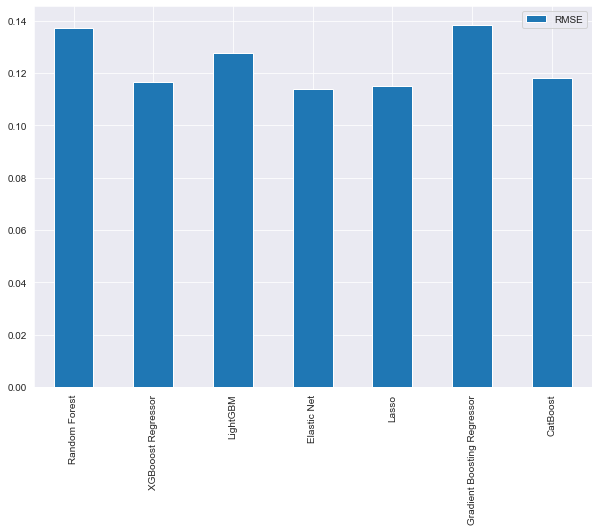

In [125]:
model_df.plot(kind = 'bar' , figsize =  (10 ,7))

## Stacked  Regressor

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor ,RandomForestRegressor

## base models
level0 = [
    ('rf' ,RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=5,
                      n_estimators=1000)),
    ('xgboost' , xgb),
    ('lgbm' , lgbm),
    ('enet' ,  enet),
    ('lasso' , lasso_pipe),
    ('gbr' , gbr),
    ('cboost' , cboost)
]

## meta model - Elastic Net
level1 = enet

stacked_model = StackingRegressor(estimators = level0 , final_estimator=level1 , cv =5)
stacked_model.fit(X_train  , y_train_transform)

0:	learn: 0.3753228	total: 6.46ms	remaining: 1.28s
1:	learn: 0.3507251	total: 12.9ms	remaining: 1.28s
2:	learn: 0.3292263	total: 19.4ms	remaining: 1.27s
3:	learn: 0.3106395	total: 25.7ms	remaining: 1.26s
4:	learn: 0.2936395	total: 32.2ms	remaining: 1.25s
5:	learn: 0.2775999	total: 38.6ms	remaining: 1.25s
6:	learn: 0.2638701	total: 44.2ms	remaining: 1.22s
7:	learn: 0.2502500	total: 50.6ms	remaining: 1.22s
8:	learn: 0.2392871	total: 56.9ms	remaining: 1.21s
9:	learn: 0.2285656	total: 63ms	remaining: 1.2s
10:	learn: 0.2198478	total: 69.5ms	remaining: 1.19s
11:	learn: 0.2121562	total: 75.7ms	remaining: 1.19s
12:	learn: 0.2043168	total: 82.4ms	remaining: 1.19s
13:	learn: 0.1984587	total: 88.8ms	remaining: 1.18s
14:	learn: 0.1917180	total: 94.9ms	remaining: 1.17s
15:	learn: 0.1863587	total: 101ms	remaining: 1.16s
16:	learn: 0.1813330	total: 107ms	remaining: 1.16s
17:	learn: 0.1764114	total: 114ms	remaining: 1.15s
18:	learn: 0.1718110	total: 120ms	remaining: 1.14s
19:	learn: 0.1680976	total: 1

171:	learn: 0.0888533	total: 1.02s	remaining: 166ms
172:	learn: 0.0886421	total: 1.02s	remaining: 160ms
173:	learn: 0.0884600	total: 1.03s	remaining: 153ms
174:	learn: 0.0882393	total: 1.03s	remaining: 147ms
175:	learn: 0.0881685	total: 1.03s	remaining: 141ms
176:	learn: 0.0880598	total: 1.04s	remaining: 135ms
177:	learn: 0.0878331	total: 1.04s	remaining: 129ms
178:	learn: 0.0876284	total: 1.06s	remaining: 125ms
179:	learn: 0.0874049	total: 1.07s	remaining: 119ms
180:	learn: 0.0873125	total: 1.07s	remaining: 113ms
181:	learn: 0.0872811	total: 1.08s	remaining: 107ms
182:	learn: 0.0872158	total: 1.09s	remaining: 101ms
183:	learn: 0.0871279	total: 1.09s	remaining: 95.1ms
184:	learn: 0.0870409	total: 1.1s	remaining: 89.1ms
185:	learn: 0.0868374	total: 1.1s	remaining: 83.2ms
186:	learn: 0.0867384	total: 1.11s	remaining: 77.3ms
187:	learn: 0.0865833	total: 1.12s	remaining: 71.4ms
188:	learn: 0.0863837	total: 1.12s	remaining: 65.4ms
189:	learn: 0.0861392	total: 1.13s	remaining: 59.5ms
190:	le

C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because 

0:	learn: 0.3752013	total: 9.85ms	remaining: 1.96s
1:	learn: 0.3546108	total: 18.1ms	remaining: 1.79s
2:	learn: 0.3332822	total: 25.2ms	remaining: 1.66s
3:	learn: 0.3144444	total: 30.3ms	remaining: 1.49s
4:	learn: 0.2969194	total: 36.1ms	remaining: 1.41s
5:	learn: 0.2807258	total: 41.9ms	remaining: 1.35s
6:	learn: 0.2659386	total: 47.1ms	remaining: 1.3s
7:	learn: 0.2545065	total: 52.4ms	remaining: 1.26s
8:	learn: 0.2436246	total: 57.4ms	remaining: 1.22s
9:	learn: 0.2343523	total: 62ms	remaining: 1.18s
10:	learn: 0.2242269	total: 66.4ms	remaining: 1.14s
11:	learn: 0.2155929	total: 71.9ms	remaining: 1.13s
12:	learn: 0.2089304	total: 76.5ms	remaining: 1.1s
13:	learn: 0.2011016	total: 81.5ms	remaining: 1.08s
14:	learn: 0.1942122	total: 86.3ms	remaining: 1.06s
15:	learn: 0.1892858	total: 91.2ms	remaining: 1.05s
16:	learn: 0.1837688	total: 96.3ms	remaining: 1.04s
17:	learn: 0.1795556	total: 101ms	remaining: 1.02s
18:	learn: 0.1747645	total: 106ms	remaining: 1.01s
19:	learn: 0.1707791	total: 

175:	learn: 0.0858772	total: 822ms	remaining: 112ms
176:	learn: 0.0857183	total: 826ms	remaining: 107ms
177:	learn: 0.0855630	total: 831ms	remaining: 103ms
178:	learn: 0.0853694	total: 835ms	remaining: 97.9ms
179:	learn: 0.0851701	total: 838ms	remaining: 93.2ms
180:	learn: 0.0849256	total: 843ms	remaining: 88.5ms
181:	learn: 0.0847278	total: 850ms	remaining: 84ms
182:	learn: 0.0846086	total: 856ms	remaining: 79.5ms
183:	learn: 0.0845873	total: 862ms	remaining: 74.9ms
184:	learn: 0.0845454	total: 869ms	remaining: 70.5ms
185:	learn: 0.0844682	total: 876ms	remaining: 65.9ms
186:	learn: 0.0842627	total: 881ms	remaining: 61.2ms
187:	learn: 0.0840795	total: 886ms	remaining: 56.6ms
188:	learn: 0.0838216	total: 892ms	remaining: 51.9ms
189:	learn: 0.0837255	total: 897ms	remaining: 47.2ms
190:	learn: 0.0834608	total: 903ms	remaining: 42.5ms
191:	learn: 0.0831677	total: 908ms	remaining: 37.8ms
192:	learn: 0.0828814	total: 913ms	remaining: 33.1ms
193:	learn: 0.0827033	total: 919ms	remaining: 28.4m

167:	learn: 0.0865057	total: 824ms	remaining: 157ms
168:	learn: 0.0863793	total: 827ms	remaining: 152ms
169:	learn: 0.0861703	total: 831ms	remaining: 147ms
170:	learn: 0.0859719	total: 834ms	remaining: 141ms
171:	learn: 0.0859491	total: 837ms	remaining: 136ms
172:	learn: 0.0857426	total: 840ms	remaining: 131ms
173:	learn: 0.0855234	total: 843ms	remaining: 126ms
174:	learn: 0.0853847	total: 847ms	remaining: 121ms
175:	learn: 0.0851494	total: 851ms	remaining: 116ms
176:	learn: 0.0849850	total: 856ms	remaining: 111ms
177:	learn: 0.0848310	total: 861ms	remaining: 106ms
178:	learn: 0.0846379	total: 866ms	remaining: 102ms
179:	learn: 0.0843674	total: 870ms	remaining: 96.7ms
180:	learn: 0.0842115	total: 875ms	remaining: 91.9ms
181:	learn: 0.0841904	total: 880ms	remaining: 87ms
182:	learn: 0.0840656	total: 884ms	remaining: 82.1ms
183:	learn: 0.0839317	total: 889ms	remaining: 77.3ms
184:	learn: 0.0839001	total: 894ms	remaining: 72.5ms
185:	learn: 0.0838278	total: 899ms	remaining: 67.6ms
186:	le

157:	learn: 0.0854871	total: 835ms	remaining: 222ms
158:	learn: 0.0853747	total: 838ms	remaining: 216ms
159:	learn: 0.0851853	total: 842ms	remaining: 210ms
160:	learn: 0.0851207	total: 845ms	remaining: 205ms
161:	learn: 0.0849430	total: 849ms	remaining: 199ms
162:	learn: 0.0847544	total: 853ms	remaining: 194ms
163:	learn: 0.0845989	total: 857ms	remaining: 188ms
164:	learn: 0.0843873	total: 861ms	remaining: 183ms
165:	learn: 0.0842095	total: 866ms	remaining: 177ms
166:	learn: 0.0841532	total: 870ms	remaining: 172ms
167:	learn: 0.0840151	total: 875ms	remaining: 167ms
168:	learn: 0.0837744	total: 880ms	remaining: 161ms
169:	learn: 0.0835898	total: 885ms	remaining: 156ms
170:	learn: 0.0834288	total: 890ms	remaining: 151ms
171:	learn: 0.0831290	total: 895ms	remaining: 146ms
172:	learn: 0.0829820	total: 900ms	remaining: 140ms
173:	learn: 0.0828125	total: 906ms	remaining: 135ms
174:	learn: 0.0826887	total: 911ms	remaining: 130ms
175:	learn: 0.0825482	total: 916ms	remaining: 125ms
176:	learn: 

142:	learn: 0.0927490	total: 665ms	remaining: 265ms
143:	learn: 0.0925455	total: 669ms	remaining: 260ms
144:	learn: 0.0922463	total: 673ms	remaining: 255ms
145:	learn: 0.0919475	total: 678ms	remaining: 251ms
146:	learn: 0.0917807	total: 682ms	remaining: 246ms
147:	learn: 0.0914177	total: 686ms	remaining: 241ms
148:	learn: 0.0911914	total: 691ms	remaining: 236ms
149:	learn: 0.0911433	total: 696ms	remaining: 232ms
150:	learn: 0.0910154	total: 701ms	remaining: 228ms
151:	learn: 0.0909311	total: 707ms	remaining: 223ms
152:	learn: 0.0906567	total: 713ms	remaining: 219ms
153:	learn: 0.0906137	total: 719ms	remaining: 215ms
154:	learn: 0.0904152	total: 724ms	remaining: 210ms
155:	learn: 0.0901925	total: 729ms	remaining: 206ms
156:	learn: 0.0899751	total: 735ms	remaining: 201ms
157:	learn: 0.0898930	total: 740ms	remaining: 197ms
158:	learn: 0.0898433	total: 746ms	remaining: 192ms
159:	learn: 0.0896843	total: 751ms	remaining: 188ms
160:	learn: 0.0895808	total: 756ms	remaining: 183ms
161:	learn: 

103:	learn: 0.0996578	total: 489ms	remaining: 451ms
104:	learn: 0.0991747	total: 492ms	remaining: 446ms
105:	learn: 0.0989354	total: 496ms	remaining: 440ms
106:	learn: 0.0988796	total: 500ms	remaining: 435ms
107:	learn: 0.0985435	total: 504ms	remaining: 430ms
108:	learn: 0.0981802	total: 511ms	remaining: 426ms
109:	learn: 0.0980231	total: 516ms	remaining: 422ms
110:	learn: 0.0977015	total: 521ms	remaining: 418ms
111:	learn: 0.0974142	total: 527ms	remaining: 414ms
112:	learn: 0.0971223	total: 533ms	remaining: 410ms
113:	learn: 0.0967718	total: 538ms	remaining: 406ms
114:	learn: 0.0966418	total: 544ms	remaining: 402ms
115:	learn: 0.0964556	total: 550ms	remaining: 398ms
116:	learn: 0.0961198	total: 555ms	remaining: 394ms
117:	learn: 0.0958690	total: 560ms	remaining: 389ms
118:	learn: 0.0956275	total: 566ms	remaining: 385ms
119:	learn: 0.0953532	total: 571ms	remaining: 381ms
120:	learn: 0.0952440	total: 576ms	remaining: 376ms
121:	learn: 0.0950543	total: 582ms	remaining: 372ms
122:	learn: 

StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(max_depth=15,
                                                     max_features='sqrt',
                                                     min_samples_split=5,
                                                     n_estimators=1000)),
                              ('xgboost',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.7, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.01,
                                            max_delta_s...
                               Pipeline(steps=[('rob

In [84]:
### Submission

pred_stacked = stacked_model.predict(X_test)
pred_stacked = np.exp(pred_stacked)

sub = pd.DataFrame(data =range(1461 , 2920) , columns = ['Id'])
sub['SalePrice'] = pred_stacked

sub.to_csv('sub11' ,index = False)
sub.head()

C:\Users\RUSSEL\ANACONDA3\envs\houseprice\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,Id,SalePrice
0,1461,117856.761304
1,1462,155975.997600
2,1463,185567.472320
3,1464,193706.141942
4,1465,195397.107132


In [86]:
##saving the model
import pickle

file = open('stacked_regression_model.pkl','wb')
pickle.dump(stacked_model , file)


In [71]:
# import pickle


# filename = 'stacked_regression_model.pkl'
# stacked_model = pickle.load(open(filename, 'rb'))

In [76]:
## Evaluating the model

rmsle_cv(stacked_model).mean()

0:	learn: 0.3752013	total: 9.4ms	remaining: 1.87s
1:	learn: 0.3546108	total: 18.1ms	remaining: 1.79s
2:	learn: 0.3332822	total: 26.6ms	remaining: 1.75s
3:	learn: 0.3144444	total: 32.4ms	remaining: 1.59s
4:	learn: 0.2969194	total: 37.9ms	remaining: 1.48s
5:	learn: 0.2807258	total: 43.3ms	remaining: 1.4s
6:	learn: 0.2659386	total: 48.5ms	remaining: 1.34s
7:	learn: 0.2545065	total: 53.6ms	remaining: 1.29s
8:	learn: 0.2436246	total: 58.8ms	remaining: 1.25s
9:	learn: 0.2343523	total: 64ms	remaining: 1.22s
10:	learn: 0.2242269	total: 68.9ms	remaining: 1.18s
11:	learn: 0.2155929	total: 73.9ms	remaining: 1.16s
12:	learn: 0.2089304	total: 78.8ms	remaining: 1.13s
13:	learn: 0.2011016	total: 83.9ms	remaining: 1.11s
14:	learn: 0.1942122	total: 88.8ms	remaining: 1.09s
15:	learn: 0.1892858	total: 93.6ms	remaining: 1.08s
16:	learn: 0.1837688	total: 98.6ms	remaining: 1.06s
17:	learn: 0.1795556	total: 104ms	remaining: 1.05s
18:	learn: 0.1747645	total: 109ms	remaining: 1.03s
19:	learn: 0.1707791	total: 

183:	learn: 0.0845873	total: 829ms	remaining: 72.1ms
184:	learn: 0.0845454	total: 833ms	remaining: 67.5ms
185:	learn: 0.0844682	total: 836ms	remaining: 63ms
186:	learn: 0.0842627	total: 841ms	remaining: 58.4ms
187:	learn: 0.0840795	total: 845ms	remaining: 53.9ms
188:	learn: 0.0838216	total: 850ms	remaining: 49.4ms
189:	learn: 0.0837255	total: 854ms	remaining: 45ms
190:	learn: 0.0834608	total: 860ms	remaining: 40.5ms
191:	learn: 0.0831677	total: 865ms	remaining: 36.1ms
192:	learn: 0.0828814	total: 871ms	remaining: 31.6ms
193:	learn: 0.0827033	total: 876ms	remaining: 27.1ms
194:	learn: 0.0825288	total: 882ms	remaining: 22.6ms
195:	learn: 0.0823688	total: 888ms	remaining: 18.1ms
196:	learn: 0.0823501	total: 894ms	remaining: 13.6ms
197:	learn: 0.0823326	total: 899ms	remaining: 9.08ms
198:	learn: 0.0820912	total: 905ms	remaining: 4.55ms
199:	learn: 0.0818607	total: 911ms	remaining: 0us
0:	learn: 0.3721101	total: 9.17ms	remaining: 1.82s
1:	learn: 0.3512785	total: 16.9ms	remaining: 1.67s
2:	l

148:	learn: 0.0850653	total: 656ms	remaining: 224ms
149:	learn: 0.0847900	total: 659ms	remaining: 220ms
150:	learn: 0.0844179	total: 662ms	remaining: 215ms
151:	learn: 0.0841778	total: 665ms	remaining: 210ms
152:	learn: 0.0838326	total: 668ms	remaining: 205ms
153:	learn: 0.0835812	total: 671ms	remaining: 200ms
154:	learn: 0.0835444	total: 674ms	remaining: 196ms
155:	learn: 0.0833799	total: 677ms	remaining: 191ms
156:	learn: 0.0832578	total: 682ms	remaining: 187ms
157:	learn: 0.0829977	total: 686ms	remaining: 182ms
158:	learn: 0.0828561	total: 690ms	remaining: 178ms
159:	learn: 0.0828274	total: 695ms	remaining: 174ms
160:	learn: 0.0826336	total: 699ms	remaining: 169ms
161:	learn: 0.0824137	total: 702ms	remaining: 165ms
162:	learn: 0.0823063	total: 707ms	remaining: 160ms
163:	learn: 0.0819996	total: 711ms	remaining: 156ms
164:	learn: 0.0819520	total: 715ms	remaining: 152ms
165:	learn: 0.0816843	total: 720ms	remaining: 147ms
166:	learn: 0.0816600	total: 724ms	remaining: 143ms
167:	learn: 

138:	learn: 0.0844249	total: 657ms	remaining: 288ms
139:	learn: 0.0842120	total: 660ms	remaining: 283ms
140:	learn: 0.0840186	total: 663ms	remaining: 277ms
141:	learn: 0.0838704	total: 666ms	remaining: 272ms
142:	learn: 0.0837640	total: 669ms	remaining: 267ms
143:	learn: 0.0835306	total: 672ms	remaining: 261ms
144:	learn: 0.0834825	total: 675ms	remaining: 256ms
145:	learn: 0.0832924	total: 678ms	remaining: 251ms
146:	learn: 0.0831502	total: 681ms	remaining: 246ms
147:	learn: 0.0830935	total: 685ms	remaining: 241ms
148:	learn: 0.0830514	total: 690ms	remaining: 236ms
149:	learn: 0.0827948	total: 694ms	remaining: 231ms
150:	learn: 0.0827570	total: 699ms	remaining: 227ms
151:	learn: 0.0826921	total: 703ms	remaining: 222ms
152:	learn: 0.0824181	total: 707ms	remaining: 217ms
153:	learn: 0.0822303	total: 711ms	remaining: 212ms
154:	learn: 0.0820841	total: 715ms	remaining: 208ms
155:	learn: 0.0819990	total: 720ms	remaining: 203ms
156:	learn: 0.0818448	total: 724ms	remaining: 198ms
157:	learn: 

103:	learn: 0.0973335	total: 479ms	remaining: 443ms
104:	learn: 0.0971753	total: 483ms	remaining: 437ms
105:	learn: 0.0968531	total: 486ms	remaining: 431ms
106:	learn: 0.0964396	total: 488ms	remaining: 424ms
107:	learn: 0.0963704	total: 491ms	remaining: 418ms
108:	learn: 0.0963025	total: 494ms	remaining: 412ms
109:	learn: 0.0960514	total: 497ms	remaining: 407ms
110:	learn: 0.0959490	total: 500ms	remaining: 401ms
111:	learn: 0.0958896	total: 503ms	remaining: 395ms
112:	learn: 0.0954794	total: 507ms	remaining: 391ms
113:	learn: 0.0951080	total: 511ms	remaining: 386ms
114:	learn: 0.0949473	total: 515ms	remaining: 381ms
115:	learn: 0.0948942	total: 520ms	remaining: 376ms
116:	learn: 0.0946295	total: 523ms	remaining: 371ms
117:	learn: 0.0944356	total: 527ms	remaining: 366ms
118:	learn: 0.0940661	total: 531ms	remaining: 362ms
119:	learn: 0.0940086	total: 535ms	remaining: 357ms
120:	learn: 0.0936742	total: 540ms	remaining: 352ms
121:	learn: 0.0933684	total: 544ms	remaining: 348ms
122:	learn: 

97:	learn: 0.1002392	total: 486ms	remaining: 506ms
98:	learn: 0.1001503	total: 490ms	remaining: 500ms
99:	learn: 0.0998566	total: 495ms	remaining: 495ms
100:	learn: 0.0994312	total: 499ms	remaining: 489ms
101:	learn: 0.0991681	total: 503ms	remaining: 483ms
102:	learn: 0.0988027	total: 506ms	remaining: 477ms
103:	learn: 0.0983300	total: 512ms	remaining: 472ms
104:	learn: 0.0980401	total: 517ms	remaining: 467ms
105:	learn: 0.0978566	total: 521ms	remaining: 462ms
106:	learn: 0.0974974	total: 527ms	remaining: 458ms
107:	learn: 0.0972618	total: 532ms	remaining: 453ms
108:	learn: 0.0967930	total: 537ms	remaining: 448ms
109:	learn: 0.0965113	total: 542ms	remaining: 444ms
110:	learn: 0.0962355	total: 547ms	remaining: 439ms
111:	learn: 0.0959014	total: 553ms	remaining: 434ms
112:	learn: 0.0955298	total: 558ms	remaining: 429ms
113:	learn: 0.0952729	total: 562ms	remaining: 424ms
114:	learn: 0.0949488	total: 567ms	remaining: 419ms
115:	learn: 0.0948856	total: 572ms	remaining: 414ms
116:	learn: 0.0

71:	learn: 0.1107070	total: 345ms	remaining: 613ms
72:	learn: 0.1102231	total: 348ms	remaining: 606ms
73:	learn: 0.1097844	total: 352ms	remaining: 600ms
74:	learn: 0.1093494	total: 355ms	remaining: 592ms
75:	learn: 0.1084219	total: 358ms	remaining: 584ms
76:	learn: 0.1078404	total: 361ms	remaining: 577ms
77:	learn: 0.1076637	total: 364ms	remaining: 569ms
78:	learn: 0.1072611	total: 367ms	remaining: 562ms
79:	learn: 0.1064818	total: 371ms	remaining: 556ms
80:	learn: 0.1059579	total: 375ms	remaining: 551ms
81:	learn: 0.1054911	total: 379ms	remaining: 546ms
82:	learn: 0.1053030	total: 384ms	remaining: 541ms
83:	learn: 0.1045391	total: 388ms	remaining: 536ms
84:	learn: 0.1043650	total: 392ms	remaining: 531ms
85:	learn: 0.1037230	total: 396ms	remaining: 525ms
86:	learn: 0.1032784	total: 400ms	remaining: 520ms
87:	learn: 0.1027638	total: 404ms	remaining: 515ms
88:	learn: 0.1023799	total: 408ms	remaining: 509ms
89:	learn: 0.1018248	total: 413ms	remaining: 504ms
90:	learn: 0.1015190	total: 417

32:	learn: 0.1363095	total: 173ms	remaining: 875ms
33:	learn: 0.1347156	total: 176ms	remaining: 861ms
34:	learn: 0.1335665	total: 180ms	remaining: 848ms
35:	learn: 0.1321465	total: 183ms	remaining: 834ms
36:	learn: 0.1311771	total: 186ms	remaining: 821ms
37:	learn: 0.1299091	total: 190ms	remaining: 809ms
38:	learn: 0.1287718	total: 193ms	remaining: 797ms
39:	learn: 0.1278440	total: 198ms	remaining: 791ms
40:	learn: 0.1266778	total: 201ms	remaining: 781ms
41:	learn: 0.1257778	total: 205ms	remaining: 771ms
42:	learn: 0.1247571	total: 209ms	remaining: 763ms
43:	learn: 0.1238140	total: 215ms	remaining: 762ms
44:	learn: 0.1230535	total: 219ms	remaining: 756ms
45:	learn: 0.1221223	total: 223ms	remaining: 748ms
46:	learn: 0.1212092	total: 228ms	remaining: 742ms
47:	learn: 0.1203474	total: 233ms	remaining: 737ms
48:	learn: 0.1195933	total: 237ms	remaining: 732ms
49:	learn: 0.1188448	total: 242ms	remaining: 726ms
50:	learn: 0.1182898	total: 247ms	remaining: 721ms
51:	learn: 0.1176542	total: 251

0:	learn: 0.3671474	total: 7.73ms	remaining: 1.54s
1:	learn: 0.3463600	total: 15.5ms	remaining: 1.54s
2:	learn: 0.3262355	total: 23.1ms	remaining: 1.52s
3:	learn: 0.3081954	total: 29.6ms	remaining: 1.45s
4:	learn: 0.2930448	total: 34.4ms	remaining: 1.34s
5:	learn: 0.2779708	total: 39ms	remaining: 1.26s
6:	learn: 0.2656005	total: 43.9ms	remaining: 1.21s
7:	learn: 0.2542073	total: 48.6ms	remaining: 1.17s
8:	learn: 0.2434613	total: 53.3ms	remaining: 1.13s
9:	learn: 0.2329049	total: 57.9ms	remaining: 1.1s
10:	learn: 0.2228678	total: 62.6ms	remaining: 1.07s
11:	learn: 0.2158819	total: 67.5ms	remaining: 1.06s
12:	learn: 0.2087116	total: 72.5ms	remaining: 1.04s
13:	learn: 0.2011349	total: 77.3ms	remaining: 1.03s
14:	learn: 0.1948709	total: 82ms	remaining: 1.01s
15:	learn: 0.1884080	total: 86.7ms	remaining: 997ms
16:	learn: 0.1828436	total: 91.5ms	remaining: 984ms
17:	learn: 0.1777202	total: 96.3ms	remaining: 973ms
18:	learn: 0.1725641	total: 101ms	remaining: 962ms
19:	learn: 0.1685757	total: 

194:	learn: 0.0778119	total: 819ms	remaining: 21ms
195:	learn: 0.0775075	total: 823ms	remaining: 16.8ms
196:	learn: 0.0774859	total: 827ms	remaining: 12.6ms
197:	learn: 0.0774661	total: 830ms	remaining: 8.39ms
198:	learn: 0.0773556	total: 838ms	remaining: 4.21ms
199:	learn: 0.0771899	total: 842ms	remaining: 0us
0:	learn: 0.3630683	total: 10.3ms	remaining: 2.05s
1:	learn: 0.3432780	total: 19.1ms	remaining: 1.89s
2:	learn: 0.3235650	total: 24.8ms	remaining: 1.63s
3:	learn: 0.3063529	total: 29.6ms	remaining: 1.45s
4:	learn: 0.2900466	total: 34.2ms	remaining: 1.33s
5:	learn: 0.2748597	total: 39.5ms	remaining: 1.28s
6:	learn: 0.2633285	total: 45.3ms	remaining: 1.25s
7:	learn: 0.2520301	total: 51.2ms	remaining: 1.23s
8:	learn: 0.2401927	total: 57.3ms	remaining: 1.22s
9:	learn: 0.2297305	total: 63.5ms	remaining: 1.21s
10:	learn: 0.2210019	total: 69.8ms	remaining: 1.2s
11:	learn: 0.2127398	total: 76ms	remaining: 1.19s
12:	learn: 0.2043301	total: 81.4ms	remaining: 1.17s
13:	learn: 0.1984101	tot

171:	learn: 0.0773710	total: 831ms	remaining: 135ms
172:	learn: 0.0771403	total: 835ms	remaining: 130ms
173:	learn: 0.0769534	total: 838ms	remaining: 125ms
174:	learn: 0.0768086	total: 842ms	remaining: 120ms
175:	learn: 0.0764148	total: 845ms	remaining: 115ms
176:	learn: 0.0762376	total: 849ms	remaining: 110ms
177:	learn: 0.0760308	total: 853ms	remaining: 105ms
178:	learn: 0.0759036	total: 856ms	remaining: 100ms
179:	learn: 0.0756612	total: 860ms	remaining: 95.6ms
180:	learn: 0.0753348	total: 865ms	remaining: 90.8ms
181:	learn: 0.0750297	total: 870ms	remaining: 86.1ms
182:	learn: 0.0748599	total: 874ms	remaining: 81.2ms
183:	learn: 0.0748308	total: 879ms	remaining: 76.4ms
184:	learn: 0.0747179	total: 883ms	remaining: 71.6ms
185:	learn: 0.0744999	total: 887ms	remaining: 66.8ms
186:	learn: 0.0743153	total: 892ms	remaining: 62ms
187:	learn: 0.0741618	total: 896ms	remaining: 57.2ms
188:	learn: 0.0740370	total: 899ms	remaining: 52.3ms
189:	learn: 0.0739487	total: 904ms	remaining: 47.6ms
190

152:	learn: 0.0850169	total: 655ms	remaining: 201ms
153:	learn: 0.0848994	total: 661ms	remaining: 197ms
154:	learn: 0.0847982	total: 665ms	remaining: 193ms
155:	learn: 0.0845546	total: 668ms	remaining: 188ms
156:	learn: 0.0842270	total: 671ms	remaining: 184ms
157:	learn: 0.0839472	total: 673ms	remaining: 179ms
158:	learn: 0.0837232	total: 677ms	remaining: 175ms
159:	learn: 0.0835615	total: 680ms	remaining: 170ms
160:	learn: 0.0833335	total: 684ms	remaining: 166ms
161:	learn: 0.0830519	total: 688ms	remaining: 161ms
162:	learn: 0.0830163	total: 692ms	remaining: 157ms
163:	learn: 0.0829833	total: 697ms	remaining: 153ms
164:	learn: 0.0829506	total: 701ms	remaining: 149ms
165:	learn: 0.0828616	total: 705ms	remaining: 144ms
166:	learn: 0.0826505	total: 709ms	remaining: 140ms
167:	learn: 0.0825628	total: 713ms	remaining: 136ms
168:	learn: 0.0824935	total: 717ms	remaining: 132ms
169:	learn: 0.0820671	total: 721ms	remaining: 127ms
170:	learn: 0.0818654	total: 726ms	remaining: 123ms
171:	learn: 

137:	learn: 0.0911611	total: 653ms	remaining: 293ms
138:	learn: 0.0909431	total: 656ms	remaining: 288ms
139:	learn: 0.0907795	total: 660ms	remaining: 283ms
140:	learn: 0.0906031	total: 663ms	remaining: 278ms
141:	learn: 0.0902777	total: 666ms	remaining: 272ms
142:	learn: 0.0899784	total: 669ms	remaining: 267ms
143:	learn: 0.0894971	total: 672ms	remaining: 261ms
144:	learn: 0.0892288	total: 676ms	remaining: 257ms
145:	learn: 0.0891688	total: 680ms	remaining: 251ms
146:	learn: 0.0889542	total: 685ms	remaining: 247ms
147:	learn: 0.0888336	total: 689ms	remaining: 242ms
148:	learn: 0.0886858	total: 693ms	remaining: 237ms
149:	learn: 0.0883848	total: 697ms	remaining: 232ms
150:	learn: 0.0882669	total: 702ms	remaining: 228ms
151:	learn: 0.0881258	total: 706ms	remaining: 223ms
152:	learn: 0.0879093	total: 711ms	remaining: 218ms
153:	learn: 0.0876234	total: 715ms	remaining: 214ms
154:	learn: 0.0875649	total: 719ms	remaining: 209ms
155:	learn: 0.0873242	total: 723ms	remaining: 204ms
156:	learn: 

119:	learn: 0.0910311	total: 486ms	remaining: 324ms
120:	learn: 0.0908158	total: 489ms	remaining: 319ms
121:	learn: 0.0906698	total: 492ms	remaining: 315ms
122:	learn: 0.0905155	total: 495ms	remaining: 310ms
123:	learn: 0.0903521	total: 498ms	remaining: 305ms
124:	learn: 0.0900160	total: 502ms	remaining: 301ms
125:	learn: 0.0896719	total: 505ms	remaining: 297ms
126:	learn: 0.0896395	total: 509ms	remaining: 293ms
127:	learn: 0.0892926	total: 514ms	remaining: 289ms
128:	learn: 0.0891801	total: 518ms	remaining: 285ms
129:	learn: 0.0891502	total: 523ms	remaining: 282ms
130:	learn: 0.0889304	total: 529ms	remaining: 279ms
131:	learn: 0.0887858	total: 535ms	remaining: 276ms
132:	learn: 0.0883022	total: 541ms	remaining: 272ms
133:	learn: 0.0881831	total: 546ms	remaining: 269ms
134:	learn: 0.0881268	total: 551ms	remaining: 265ms
135:	learn: 0.0879015	total: 557ms	remaining: 262ms
136:	learn: 0.0876477	total: 561ms	remaining: 258ms
137:	learn: 0.0874337	total: 567ms	remaining: 255ms
138:	learn: 

108:	learn: 0.0960316	total: 497ms	remaining: 415ms
109:	learn: 0.0958325	total: 501ms	remaining: 410ms
110:	learn: 0.0953591	total: 505ms	remaining: 405ms
111:	learn: 0.0951384	total: 508ms	remaining: 399ms
112:	learn: 0.0948370	total: 511ms	remaining: 393ms
113:	learn: 0.0946430	total: 514ms	remaining: 388ms
114:	learn: 0.0943713	total: 517ms	remaining: 382ms
115:	learn: 0.0941190	total: 520ms	remaining: 377ms
116:	learn: 0.0938410	total: 525ms	remaining: 372ms
117:	learn: 0.0937422	total: 530ms	remaining: 368ms
118:	learn: 0.0933979	total: 534ms	remaining: 364ms
119:	learn: 0.0932629	total: 539ms	remaining: 359ms
120:	learn: 0.0930087	total: 544ms	remaining: 355ms
121:	learn: 0.0927656	total: 548ms	remaining: 350ms
122:	learn: 0.0923310	total: 553ms	remaining: 346ms
123:	learn: 0.0920792	total: 557ms	remaining: 342ms
124:	learn: 0.0918433	total: 562ms	remaining: 337ms
125:	learn: 0.0916683	total: 566ms	remaining: 332ms
126:	learn: 0.0915569	total: 571ms	remaining: 328ms
127:	learn: 

75:	learn: 0.1045333	total: 335ms	remaining: 546ms
76:	learn: 0.1040931	total: 338ms	remaining: 539ms
77:	learn: 0.1035645	total: 341ms	remaining: 533ms
78:	learn: 0.1033072	total: 343ms	remaining: 526ms
79:	learn: 0.1028481	total: 346ms	remaining: 520ms
80:	learn: 0.1024847	total: 349ms	remaining: 513ms
81:	learn: 0.1021523	total: 352ms	remaining: 507ms
82:	learn: 0.1018539	total: 356ms	remaining: 501ms
83:	learn: 0.1015662	total: 360ms	remaining: 496ms
84:	learn: 0.1011728	total: 364ms	remaining: 492ms
85:	learn: 0.1005828	total: 368ms	remaining: 488ms
86:	learn: 0.1002411	total: 373ms	remaining: 484ms
87:	learn: 0.0997968	total: 377ms	remaining: 480ms
88:	learn: 0.0995234	total: 382ms	remaining: 476ms
89:	learn: 0.0992285	total: 385ms	remaining: 470ms
90:	learn: 0.0990242	total: 389ms	remaining: 466ms
91:	learn: 0.0986278	total: 393ms	remaining: 461ms
92:	learn: 0.0982789	total: 397ms	remaining: 457ms
93:	learn: 0.0978012	total: 401ms	remaining: 453ms
94:	learn: 0.0973797	total: 406

62:	learn: 0.1091473	total: 329ms	remaining: 715ms
63:	learn: 0.1087092	total: 332ms	remaining: 706ms
64:	learn: 0.1083363	total: 336ms	remaining: 697ms
65:	learn: 0.1076723	total: 339ms	remaining: 688ms
66:	learn: 0.1072321	total: 342ms	remaining: 679ms
67:	learn: 0.1068920	total: 345ms	remaining: 669ms
68:	learn: 0.1066106	total: 348ms	remaining: 660ms
69:	learn: 0.1063742	total: 351ms	remaining: 651ms
70:	learn: 0.1053966	total: 354ms	remaining: 644ms
71:	learn: 0.1049621	total: 358ms	remaining: 637ms
72:	learn: 0.1044193	total: 362ms	remaining: 630ms
73:	learn: 0.1042207	total: 367ms	remaining: 624ms
74:	learn: 0.1037152	total: 371ms	remaining: 618ms
75:	learn: 0.1033065	total: 375ms	remaining: 611ms
76:	learn: 0.1028607	total: 379ms	remaining: 605ms
77:	learn: 0.1025236	total: 383ms	remaining: 599ms
78:	learn: 0.1021478	total: 387ms	remaining: 593ms
79:	learn: 0.1016629	total: 392ms	remaining: 587ms
80:	learn: 0.1012889	total: 396ms	remaining: 582ms
81:	learn: 0.1009121	total: 400

27:	learn: 0.1428031	total: 171ms	remaining: 1.05s
28:	learn: 0.1407261	total: 175ms	remaining: 1.03s
29:	learn: 0.1388027	total: 179ms	remaining: 1.01s
30:	learn: 0.1372236	total: 183ms	remaining: 995ms
31:	learn: 0.1354918	total: 186ms	remaining: 978ms
32:	learn: 0.1335459	total: 190ms	remaining: 962ms
33:	learn: 0.1319685	total: 194ms	remaining: 949ms
34:	learn: 0.1304872	total: 198ms	remaining: 934ms
35:	learn: 0.1289755	total: 202ms	remaining: 922ms
36:	learn: 0.1273073	total: 207ms	remaining: 911ms
37:	learn: 0.1265601	total: 210ms	remaining: 896ms
38:	learn: 0.1254893	total: 215ms	remaining: 887ms
39:	learn: 0.1240784	total: 219ms	remaining: 874ms
40:	learn: 0.1226500	total: 223ms	remaining: 865ms
41:	learn: 0.1215610	total: 227ms	remaining: 855ms
42:	learn: 0.1203460	total: 231ms	remaining: 845ms
43:	learn: 0.1195723	total: 236ms	remaining: 835ms
44:	learn: 0.1185967	total: 240ms	remaining: 827ms
45:	learn: 0.1176452	total: 244ms	remaining: 818ms
46:	learn: 0.1170897	total: 249

0:	learn: 0.3770224	total: 7.47ms	remaining: 1.49s
1:	learn: 0.3548847	total: 13.6ms	remaining: 1.35s
2:	learn: 0.3335152	total: 22.1ms	remaining: 1.45s
3:	learn: 0.3141542	total: 26.1ms	remaining: 1.28s
4:	learn: 0.2985215	total: 34.7ms	remaining: 1.35s
5:	learn: 0.2832742	total: 39.2ms	remaining: 1.27s
6:	learn: 0.2698078	total: 43ms	remaining: 1.18s
7:	learn: 0.2567178	total: 46.9ms	remaining: 1.12s
8:	learn: 0.2450898	total: 51.7ms	remaining: 1.1s
9:	learn: 0.2347462	total: 55.5ms	remaining: 1.05s
10:	learn: 0.2247244	total: 61.6ms	remaining: 1.06s
11:	learn: 0.2154404	total: 65.4ms	remaining: 1.02s
12:	learn: 0.2066908	total: 69.1ms	remaining: 993ms
13:	learn: 0.1996553	total: 72.9ms	remaining: 969ms
14:	learn: 0.1927465	total: 81.4ms	remaining: 1s
15:	learn: 0.1871051	total: 93.2ms	remaining: 1.07s
16:	learn: 0.1821598	total: 102ms	remaining: 1.1s
17:	learn: 0.1768092	total: 109ms	remaining: 1.1s
18:	learn: 0.1717778	total: 118ms	remaining: 1.12s
19:	learn: 0.1674864	total: 124ms

166:	learn: 0.0825299	total: 1.01s	remaining: 199ms
167:	learn: 0.0823937	total: 1.01s	remaining: 193ms
168:	learn: 0.0821931	total: 1.01s	remaining: 186ms
169:	learn: 0.0820263	total: 1.02s	remaining: 180ms
170:	learn: 0.0819248	total: 1.02s	remaining: 173ms
171:	learn: 0.0817453	total: 1.02s	remaining: 167ms
172:	learn: 0.0817148	total: 1.03s	remaining: 160ms
173:	learn: 0.0814543	total: 1.03s	remaining: 154ms
174:	learn: 0.0814251	total: 1.03s	remaining: 148ms
175:	learn: 0.0812405	total: 1.04s	remaining: 142ms
176:	learn: 0.0808887	total: 1.04s	remaining: 136ms
177:	learn: 0.0805426	total: 1.05s	remaining: 130ms
178:	learn: 0.0803266	total: 1.05s	remaining: 123ms
179:	learn: 0.0800846	total: 1.06s	remaining: 117ms
180:	learn: 0.0800060	total: 1.06s	remaining: 111ms
181:	learn: 0.0797008	total: 1.06s	remaining: 105ms
182:	learn: 0.0795624	total: 1.07s	remaining: 99.3ms
183:	learn: 0.0792996	total: 1.07s	remaining: 93.3ms
184:	learn: 0.0791762	total: 1.08s	remaining: 87.3ms
185:	lear

155:	learn: 0.0858469	total: 650ms	remaining: 183ms
156:	learn: 0.0855407	total: 655ms	remaining: 179ms
157:	learn: 0.0853061	total: 658ms	remaining: 175ms
158:	learn: 0.0850901	total: 662ms	remaining: 171ms
159:	learn: 0.0848562	total: 665ms	remaining: 166ms
160:	learn: 0.0845372	total: 668ms	remaining: 162ms
161:	learn: 0.0844850	total: 671ms	remaining: 157ms
162:	learn: 0.0841413	total: 676ms	remaining: 153ms
163:	learn: 0.0838981	total: 679ms	remaining: 149ms
164:	learn: 0.0836527	total: 684ms	remaining: 145ms
165:	learn: 0.0835047	total: 688ms	remaining: 141ms
166:	learn: 0.0830827	total: 692ms	remaining: 137ms
167:	learn: 0.0829094	total: 697ms	remaining: 133ms
168:	learn: 0.0826322	total: 701ms	remaining: 129ms
169:	learn: 0.0824814	total: 705ms	remaining: 124ms
170:	learn: 0.0821820	total: 709ms	remaining: 120ms
171:	learn: 0.0818562	total: 714ms	remaining: 116ms
172:	learn: 0.0816394	total: 718ms	remaining: 112ms
173:	learn: 0.0813642	total: 722ms	remaining: 108ms
174:	learn: 

140:	learn: 0.0931434	total: 649ms	remaining: 272ms
141:	learn: 0.0930468	total: 653ms	remaining: 267ms
142:	learn: 0.0927490	total: 656ms	remaining: 261ms
143:	learn: 0.0925455	total: 659ms	remaining: 256ms
144:	learn: 0.0922463	total: 662ms	remaining: 251ms
145:	learn: 0.0919475	total: 666ms	remaining: 246ms
146:	learn: 0.0917807	total: 669ms	remaining: 241ms
147:	learn: 0.0914177	total: 673ms	remaining: 236ms
148:	learn: 0.0911914	total: 677ms	remaining: 232ms
149:	learn: 0.0911433	total: 682ms	remaining: 227ms
150:	learn: 0.0910154	total: 687ms	remaining: 223ms
151:	learn: 0.0909311	total: 691ms	remaining: 218ms
152:	learn: 0.0906567	total: 695ms	remaining: 214ms
153:	learn: 0.0906137	total: 700ms	remaining: 209ms
154:	learn: 0.0904152	total: 705ms	remaining: 205ms
155:	learn: 0.0901925	total: 710ms	remaining: 200ms
156:	learn: 0.0899751	total: 715ms	remaining: 196ms
157:	learn: 0.0898930	total: 719ms	remaining: 191ms
158:	learn: 0.0898433	total: 723ms	remaining: 186ms
159:	learn: 

103:	learn: 0.0982632	total: 504ms	remaining: 465ms
104:	learn: 0.0981178	total: 509ms	remaining: 460ms
105:	learn: 0.0977517	total: 514ms	remaining: 456ms
106:	learn: 0.0974402	total: 518ms	remaining: 450ms
107:	learn: 0.0972909	total: 523ms	remaining: 445ms
108:	learn: 0.0971952	total: 527ms	remaining: 440ms
109:	learn: 0.0970037	total: 532ms	remaining: 436ms
110:	learn: 0.0969383	total: 538ms	remaining: 431ms
111:	learn: 0.0968786	total: 543ms	remaining: 427ms
112:	learn: 0.0966285	total: 549ms	remaining: 423ms
113:	learn: 0.0963628	total: 554ms	remaining: 418ms
114:	learn: 0.0963084	total: 561ms	remaining: 414ms
115:	learn: 0.0959549	total: 565ms	remaining: 409ms
116:	learn: 0.0955748	total: 571ms	remaining: 405ms
117:	learn: 0.0952444	total: 577ms	remaining: 401ms
118:	learn: 0.0951842	total: 585ms	remaining: 398ms
119:	learn: 0.0951266	total: 591ms	remaining: 394ms
120:	learn: 0.0950731	total: 596ms	remaining: 389ms
121:	learn: 0.0947354	total: 602ms	remaining: 385ms
122:	learn: 

77:	learn: 0.1065536	total: 331ms	remaining: 518ms
78:	learn: 0.1060711	total: 335ms	remaining: 513ms
79:	learn: 0.1056664	total: 338ms	remaining: 507ms
80:	learn: 0.1054099	total: 341ms	remaining: 500ms
81:	learn: 0.1053156	total: 344ms	remaining: 494ms
82:	learn: 0.1049102	total: 346ms	remaining: 488ms
83:	learn: 0.1047584	total: 349ms	remaining: 483ms
84:	learn: 0.1044305	total: 353ms	remaining: 478ms
85:	learn: 0.1040299	total: 357ms	remaining: 474ms
86:	learn: 0.1034393	total: 362ms	remaining: 470ms
87:	learn: 0.1033514	total: 366ms	remaining: 465ms
88:	learn: 0.1029621	total: 370ms	remaining: 462ms
89:	learn: 0.1028795	total: 374ms	remaining: 457ms
90:	learn: 0.1026258	total: 378ms	remaining: 453ms
91:	learn: 0.1022828	total: 382ms	remaining: 449ms
92:	learn: 0.1022080	total: 386ms	remaining: 445ms
93:	learn: 0.1021373	total: 389ms	remaining: 439ms
94:	learn: 0.1020707	total: 393ms	remaining: 435ms
95:	learn: 0.1016289	total: 398ms	remaining: 431ms
96:	learn: 0.1013524	total: 402

71:	learn: 0.1080557	total: 341ms	remaining: 607ms
72:	learn: 0.1076329	total: 344ms	remaining: 599ms
73:	learn: 0.1073838	total: 348ms	remaining: 592ms
74:	learn: 0.1072286	total: 351ms	remaining: 585ms
75:	learn: 0.1070618	total: 355ms	remaining: 579ms
76:	learn: 0.1064707	total: 358ms	remaining: 572ms
77:	learn: 0.1061921	total: 361ms	remaining: 565ms
78:	learn: 0.1057165	total: 365ms	remaining: 559ms
79:	learn: 0.1051329	total: 369ms	remaining: 553ms
80:	learn: 0.1048312	total: 373ms	remaining: 548ms
81:	learn: 0.1042868	total: 377ms	remaining: 543ms
82:	learn: 0.1037519	total: 382ms	remaining: 538ms
83:	learn: 0.1033975	total: 386ms	remaining: 533ms
84:	learn: 0.1029225	total: 389ms	remaining: 527ms
85:	learn: 0.1026955	total: 394ms	remaining: 522ms
86:	learn: 0.1023659	total: 398ms	remaining: 517ms
87:	learn: 0.1021185	total: 403ms	remaining: 513ms
88:	learn: 0.1016217	total: 407ms	remaining: 508ms
89:	learn: 0.1012039	total: 412ms	remaining: 503ms
90:	learn: 0.1007880	total: 416

37:	learn: 0.1315956	total: 167ms	remaining: 710ms
38:	learn: 0.1308247	total: 170ms	remaining: 701ms
39:	learn: 0.1299882	total: 173ms	remaining: 693ms
40:	learn: 0.1288115	total: 177ms	remaining: 687ms
41:	learn: 0.1280632	total: 181ms	remaining: 680ms
42:	learn: 0.1271252	total: 184ms	remaining: 672ms
43:	learn: 0.1262639	total: 188ms	remaining: 665ms
44:	learn: 0.1255948	total: 191ms	remaining: 657ms
45:	learn: 0.1248401	total: 195ms	remaining: 654ms
46:	learn: 0.1239536	total: 199ms	remaining: 649ms
47:	learn: 0.1231316	total: 204ms	remaining: 645ms
48:	learn: 0.1225470	total: 208ms	remaining: 641ms
49:	learn: 0.1218955	total: 212ms	remaining: 636ms
50:	learn: 0.1213588	total: 216ms	remaining: 632ms
51:	learn: 0.1209955	total: 220ms	remaining: 626ms
52:	learn: 0.1203940	total: 224ms	remaining: 622ms
53:	learn: 0.1199126	total: 229ms	remaining: 618ms
54:	learn: 0.1191788	total: 234ms	remaining: 616ms
55:	learn: 0.1185834	total: 239ms	remaining: 615ms
56:	learn: 0.1181397	total: 244

0:	learn: 0.3830417	total: 6.4ms	remaining: 1.27s
1:	learn: 0.3612928	total: 12.3ms	remaining: 1.22s
2:	learn: 0.3402177	total: 17.8ms	remaining: 1.17s
3:	learn: 0.3220791	total: 23.2ms	remaining: 1.14s
4:	learn: 0.3048137	total: 28.7ms	remaining: 1.12s
5:	learn: 0.2897584	total: 33.7ms	remaining: 1.09s
6:	learn: 0.2749822	total: 38.9ms	remaining: 1.07s
7:	learn: 0.2611037	total: 45.5ms	remaining: 1.09s
8:	learn: 0.2485251	total: 52.1ms	remaining: 1.11s
9:	learn: 0.2381269	total: 58.7ms	remaining: 1.11s
10:	learn: 0.2285370	total: 64.4ms	remaining: 1.11s
11:	learn: 0.2203574	total: 70.9ms	remaining: 1.11s
12:	learn: 0.2110463	total: 77.6ms	remaining: 1.12s
13:	learn: 0.2043384	total: 83.5ms	remaining: 1.11s
14:	learn: 0.1980230	total: 88.8ms	remaining: 1.09s
15:	learn: 0.1922837	total: 95.6ms	remaining: 1.1s
16:	learn: 0.1867290	total: 102ms	remaining: 1.09s
17:	learn: 0.1820112	total: 107ms	remaining: 1.08s
18:	learn: 0.1770052	total: 113ms	remaining: 1.07s
19:	learn: 0.1719622	total:

186:	learn: 0.0822177	total: 826ms	remaining: 57.4ms
187:	learn: 0.0820324	total: 829ms	remaining: 52.9ms
188:	learn: 0.0820106	total: 832ms	remaining: 48.4ms
189:	learn: 0.0818164	total: 835ms	remaining: 44ms
190:	learn: 0.0816168	total: 839ms	remaining: 39.5ms
191:	learn: 0.0814589	total: 842ms	remaining: 35.1ms
192:	learn: 0.0812421	total: 845ms	remaining: 30.6ms
193:	learn: 0.0810998	total: 848ms	remaining: 26.2ms
194:	learn: 0.0809231	total: 852ms	remaining: 21.8ms
195:	learn: 0.0804671	total: 856ms	remaining: 17.5ms
196:	learn: 0.0802517	total: 860ms	remaining: 13.1ms
197:	learn: 0.0802314	total: 864ms	remaining: 8.73ms
198:	learn: 0.0800566	total: 868ms	remaining: 4.36ms
199:	learn: 0.0799262	total: 872ms	remaining: 0us
0:	learn: 0.3765981	total: 5.51ms	remaining: 1.1s
1:	learn: 0.3547334	total: 10.3ms	remaining: 1.02s
2:	learn: 0.3330912	total: 14.9ms	remaining: 976ms
3:	learn: 0.3147255	total: 19.6ms	remaining: 962ms
4:	learn: 0.2970206	total: 24.5ms	remaining: 955ms
5:	learn:

182:	learn: 0.0843509	total: 814ms	remaining: 75.6ms
183:	learn: 0.0843033	total: 817ms	remaining: 71.1ms
184:	learn: 0.0841828	total: 821ms	remaining: 66.6ms
185:	learn: 0.0840493	total: 825ms	remaining: 62.1ms
186:	learn: 0.0840047	total: 829ms	remaining: 57.6ms
187:	learn: 0.0838600	total: 833ms	remaining: 53.2ms
188:	learn: 0.0836675	total: 837ms	remaining: 48.7ms
189:	learn: 0.0836424	total: 842ms	remaining: 44.3ms
190:	learn: 0.0834991	total: 848ms	remaining: 39.9ms
191:	learn: 0.0834309	total: 853ms	remaining: 35.5ms
192:	learn: 0.0832467	total: 858ms	remaining: 31.1ms
193:	learn: 0.0832178	total: 863ms	remaining: 26.7ms
194:	learn: 0.0831740	total: 868ms	remaining: 22.3ms
195:	learn: 0.0829622	total: 873ms	remaining: 17.8ms
196:	learn: 0.0828052	total: 878ms	remaining: 13.4ms
197:	learn: 0.0827281	total: 884ms	remaining: 8.93ms
198:	learn: 0.0826935	total: 888ms	remaining: 4.46ms
199:	learn: 0.0824981	total: 894ms	remaining: 0us
0:	learn: 0.3811758	total: 8.05ms	remaining: 1.6s

154:	learn: 0.0837750	total: 649ms	remaining: 188ms
155:	learn: 0.0834668	total: 653ms	remaining: 184ms
156:	learn: 0.0833681	total: 656ms	remaining: 180ms
157:	learn: 0.0831583	total: 659ms	remaining: 175ms
158:	learn: 0.0828521	total: 662ms	remaining: 171ms
159:	learn: 0.0827884	total: 666ms	remaining: 166ms
160:	learn: 0.0826505	total: 668ms	remaining: 162ms
161:	learn: 0.0824904	total: 671ms	remaining: 157ms
162:	learn: 0.0824461	total: 675ms	remaining: 153ms
163:	learn: 0.0822777	total: 678ms	remaining: 149ms
164:	learn: 0.0822258	total: 682ms	remaining: 145ms
165:	learn: 0.0820560	total: 686ms	remaining: 141ms
166:	learn: 0.0818841	total: 691ms	remaining: 136ms
167:	learn: 0.0816902	total: 695ms	remaining: 132ms
168:	learn: 0.0816528	total: 698ms	remaining: 128ms
169:	learn: 0.0815408	total: 702ms	remaining: 124ms
170:	learn: 0.0812164	total: 707ms	remaining: 120ms
171:	learn: 0.0810129	total: 714ms	remaining: 116ms
172:	learn: 0.0809100	total: 721ms	remaining: 112ms
173:	learn: 

143:	learn: 0.0867448	total: 650ms	remaining: 253ms
144:	learn: 0.0863243	total: 653ms	remaining: 248ms
145:	learn: 0.0860357	total: 657ms	remaining: 243ms
146:	learn: 0.0859900	total: 659ms	remaining: 238ms
147:	learn: 0.0856281	total: 662ms	remaining: 233ms
148:	learn: 0.0854802	total: 665ms	remaining: 228ms
149:	learn: 0.0852030	total: 668ms	remaining: 223ms
150:	learn: 0.0850373	total: 671ms	remaining: 218ms
151:	learn: 0.0849873	total: 675ms	remaining: 213ms
152:	learn: 0.0849519	total: 678ms	remaining: 208ms
153:	learn: 0.0849122	total: 682ms	remaining: 204ms
154:	learn: 0.0847724	total: 686ms	remaining: 199ms
155:	learn: 0.0847287	total: 691ms	remaining: 195ms
156:	learn: 0.0846930	total: 695ms	remaining: 190ms
157:	learn: 0.0846590	total: 698ms	remaining: 186ms
158:	learn: 0.0844150	total: 701ms	remaining: 181ms
159:	learn: 0.0841730	total: 706ms	remaining: 176ms
160:	learn: 0.0839854	total: 710ms	remaining: 172ms
161:	learn: 0.0839476	total: 714ms	remaining: 168ms
162:	learn: 

109:	learn: 0.0937728	total: 494ms	remaining: 404ms
110:	learn: 0.0935369	total: 497ms	remaining: 399ms
111:	learn: 0.0933951	total: 501ms	remaining: 393ms
112:	learn: 0.0931908	total: 504ms	remaining: 388ms
113:	learn: 0.0930004	total: 507ms	remaining: 383ms
114:	learn: 0.0926207	total: 510ms	remaining: 377ms
115:	learn: 0.0924059	total: 513ms	remaining: 372ms
116:	learn: 0.0920474	total: 516ms	remaining: 366ms
117:	learn: 0.0918175	total: 520ms	remaining: 361ms
118:	learn: 0.0913564	total: 523ms	remaining: 356ms
119:	learn: 0.0911856	total: 527ms	remaining: 351ms
120:	learn: 0.0908445	total: 531ms	remaining: 347ms
121:	learn: 0.0905148	total: 535ms	remaining: 342ms
122:	learn: 0.0902231	total: 539ms	remaining: 338ms
123:	learn: 0.0898921	total: 543ms	remaining: 333ms
124:	learn: 0.0898314	total: 546ms	remaining: 328ms
125:	learn: 0.0895565	total: 551ms	remaining: 323ms
126:	learn: 0.0892776	total: 555ms	remaining: 319ms
127:	learn: 0.0890889	total: 559ms	remaining: 314ms
128:	learn: 

74:	learn: 0.1083212	total: 334ms	remaining: 556ms
75:	learn: 0.1078326	total: 337ms	remaining: 550ms
76:	learn: 0.1074016	total: 340ms	remaining: 543ms
77:	learn: 0.1071209	total: 343ms	remaining: 537ms
78:	learn: 0.1066415	total: 346ms	remaining: 530ms
79:	learn: 0.1064331	total: 349ms	remaining: 523ms
80:	learn: 0.1062592	total: 351ms	remaining: 516ms
81:	learn: 0.1061014	total: 354ms	remaining: 510ms
82:	learn: 0.1057510	total: 358ms	remaining: 504ms
83:	learn: 0.1055922	total: 362ms	remaining: 499ms
84:	learn: 0.1053253	total: 366ms	remaining: 495ms
85:	learn: 0.1052018	total: 370ms	remaining: 490ms
86:	learn: 0.1047896	total: 374ms	remaining: 486ms
87:	learn: 0.1043830	total: 378ms	remaining: 481ms
88:	learn: 0.1040199	total: 382ms	remaining: 476ms
89:	learn: 0.1034529	total: 386ms	remaining: 472ms
90:	learn: 0.1030199	total: 390ms	remaining: 468ms
91:	learn: 0.1028818	total: 394ms	remaining: 463ms
92:	learn: 0.1026475	total: 398ms	remaining: 458ms
93:	learn: 0.1025134	total: 403

70:	learn: 0.1086993	total: 340ms	remaining: 618ms
71:	learn: 0.1081692	total: 344ms	remaining: 611ms
72:	learn: 0.1078187	total: 347ms	remaining: 604ms
73:	learn: 0.1071340	total: 351ms	remaining: 597ms
74:	learn: 0.1067636	total: 355ms	remaining: 591ms
75:	learn: 0.1063343	total: 359ms	remaining: 586ms
76:	learn: 0.1062304	total: 363ms	remaining: 580ms
77:	learn: 0.1059143	total: 368ms	remaining: 575ms
78:	learn: 0.1055133	total: 373ms	remaining: 571ms
79:	learn: 0.1054160	total: 378ms	remaining: 567ms
80:	learn: 0.1051769	total: 383ms	remaining: 563ms
81:	learn: 0.1049735	total: 388ms	remaining: 558ms
82:	learn: 0.1044540	total: 393ms	remaining: 554ms
83:	learn: 0.1043542	total: 398ms	remaining: 550ms
84:	learn: 0.1042510	total: 403ms	remaining: 545ms
85:	learn: 0.1041263	total: 408ms	remaining: 541ms
86:	learn: 0.1040088	total: 413ms	remaining: 537ms
87:	learn: 0.1034270	total: 419ms	remaining: 533ms
88:	learn: 0.1028647	total: 423ms	remaining: 527ms
89:	learn: 0.1025769	total: 427

0.11080496703609337